# Problem Statement

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

# Data Dictionary

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

1. case_id: ID of each visa application
2. continent: Information of continent the employee
3. education_of_employee: Information of education of the employee
4. has_job_experience: Does the employee have any job experience? Y= Yes; N = No
5. requires_job_training: Does the employee require any job training? Y = Yes; N = No
6. no_of_employees: Number of employees in the employer's company
7. yr_of_estab: Year in which the employer's company was established
8. region_of_employment: Information of foreign worker's intended region of employment in the US.
9. prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
10. unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
11. full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
12. case_status: Flag indicating if the Visa was certified or denied

# Import necessary Libraries

In [ ]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
from os import system
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [ ]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


# Loading Data

In [ ]:
# Reading the data
data = pd.read_csv("EasyVisa.csv")
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# Converting all object Datatype to Categorical
cat_col = data.select_dtypes("object").columns.tolist()

for col in cat_col:
  data[col] = data[col].astype("category")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB
None


In [ ]:
# 5 Summary stat of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


# Check missing value

In [ ]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are no missing values hence there is no need for any missing value treatment

# Exploratory Data Analysis

In [ ]:
def plot_countplot(col_name, data=data, labels=None, rotation=0, hue=None, perc=False):
  """Function to plot a bar chart for categorical variables
  col_name: Name of column in DataFrame
  data: DataFrame to be passed, (default:data)
  labels: List of labels in the axis
  rotation: Rotation of the labels
  hue: Column name by which the bar chart will be demarcated
  perc: To show percentage on the barchart
  """

  counts = data[col_name].value_counts().sort_index()
  if hue != None:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=hue);
  else:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=col_name);
    for i,count_ in enumerate(counts.tolist()):
      if perc==True:
        count_plot.annotate(f"{str(round(count_/len(data)*100, 2))}%", xy=(i,count_), horizontalalignment="center");
      else:
        count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  if labels != None:
    count_plot.set_xticklabels(labels, rotation=rotation);
  else:
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);

In [ ]:
def plot_histogram_countplot_boxplot(col_name, histplot=False, hue=None):
  """ Function to plot Histogram/Countplot and Boxplot for numerical data
  col_name: Name of the column
  histplot: Whether to plot histogram or not (default: False, if True, countplot is plotted)
  hue: Column name by which the bar chart will be demarcated

  returns: Plot
  """

  counts = data[col_name].value_counts().sort_index().tolist()
  fig, axes = plt.subplots(3,1,figsize=(15,10));
  if histplot == True:
    count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral");
  else:
    count_plot = sns.countplot(data=data, x=col_name, ax=axes[0], palette="Spectral");
  if hue == None and histplot==False:
    for i,count_ in enumerate(counts):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  axes[0].axvline(x=data[col_name].mean(), color="r");

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral");
  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[2], showmeans=True, hue=hue, palette="Spectral", showfliers=False);
  return count_plot

## Univariate Analysis

### case_id

In [ ]:
data["case_id"].nunique()

25480

There are 25480 cases in the data

### continent

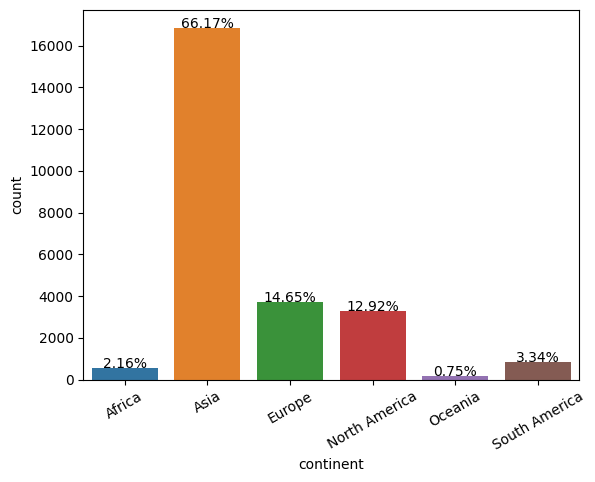

In [ ]:
plot_countplot("continent", perc=True, rotation=30)

67% of the application are from Asia, Europe and North America follows. \
Least amount of applications are from the Oceania Continent

### education_of_employee

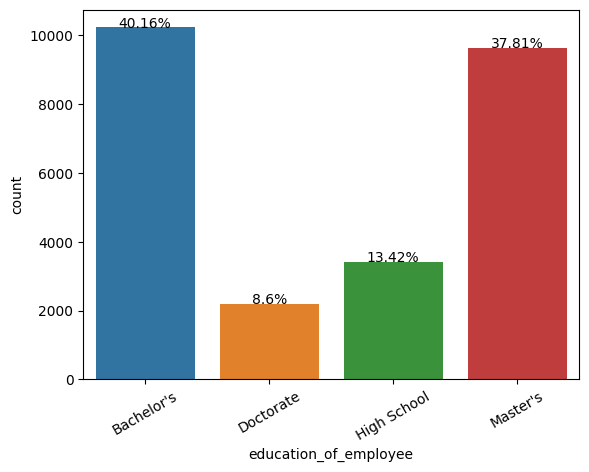

In [ ]:
plot_countplot("education_of_employee", rotation=30, perc=True)

There is an almost similar distribution between people who have pursued Bachelor's and Master's which is seen through out the migration population otherwise. Very few people choose migrate to US when completed High School and Doctorate as these people are underqualified or overqualified

### has_job_experience

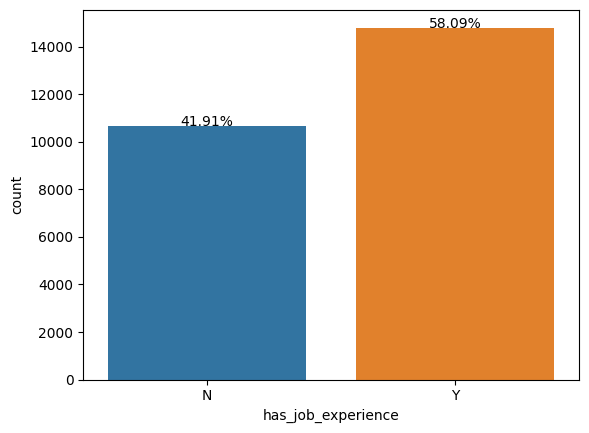

In [ ]:
plot_countplot("has_job_experience", perc=True)

**~60%** of the the applicants have job experience and **~40%** of the applicants do not job experience. The seperation between the two groups is not much.

### requires_job_training

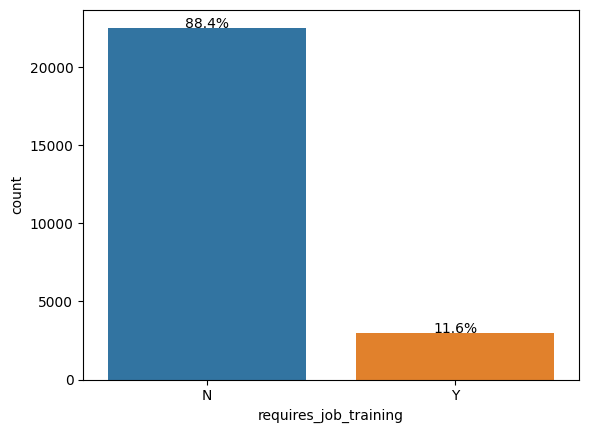

In [ ]:
plot_countplot("requires_job_training", perc=True)

**~90%** of the applicants do not require training and only **~10%** of the applicants require training. This may be because many jobs require job experience hence job training may not be required

### no_of_employees

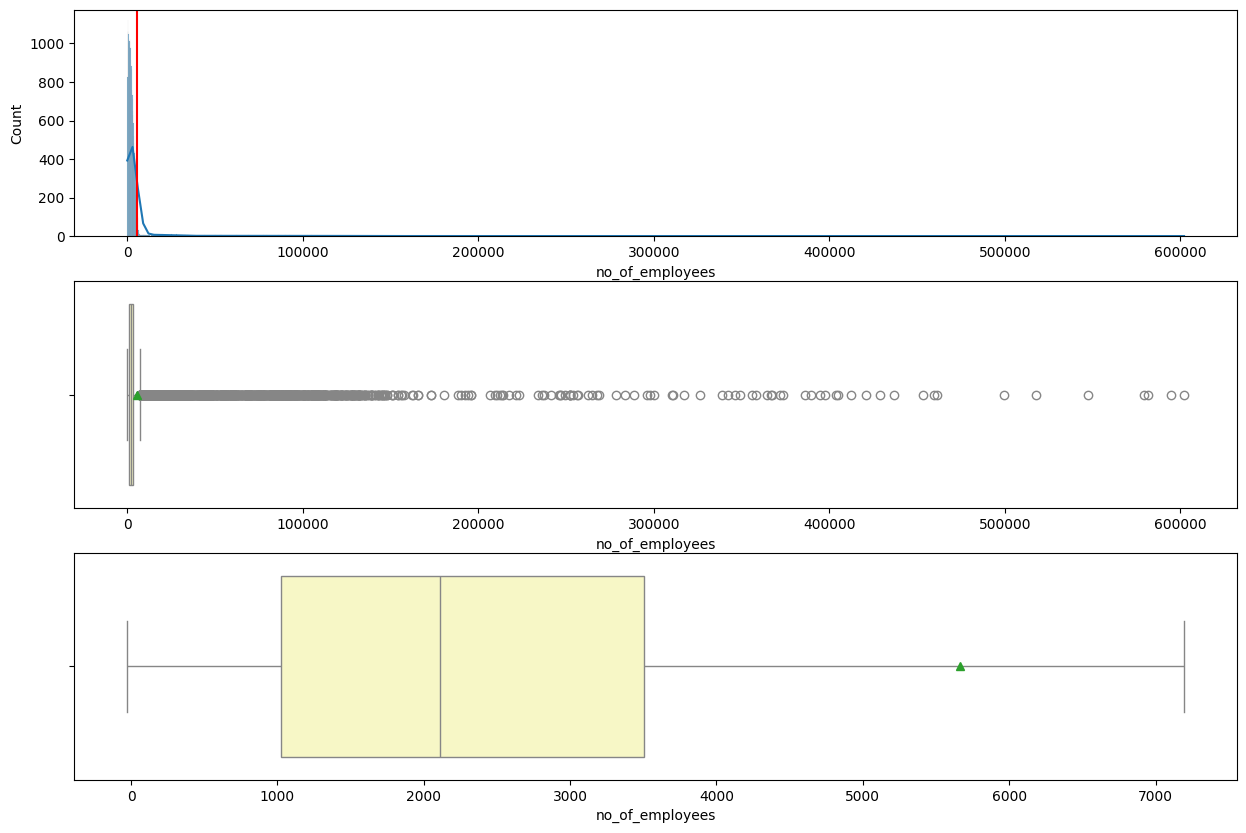

In [ ]:
plot_histogram_countplot_boxplot("no_of_employees", histplot=True);

This is a very highly right skewed distribution and datapoint above 7000 tend to be outliers. However on average(after considering outliers), each case had ~6000 applicants for a particular employer

### yr_of_estab

<Axes: xlabel='yr_of_estab', ylabel='Count'>

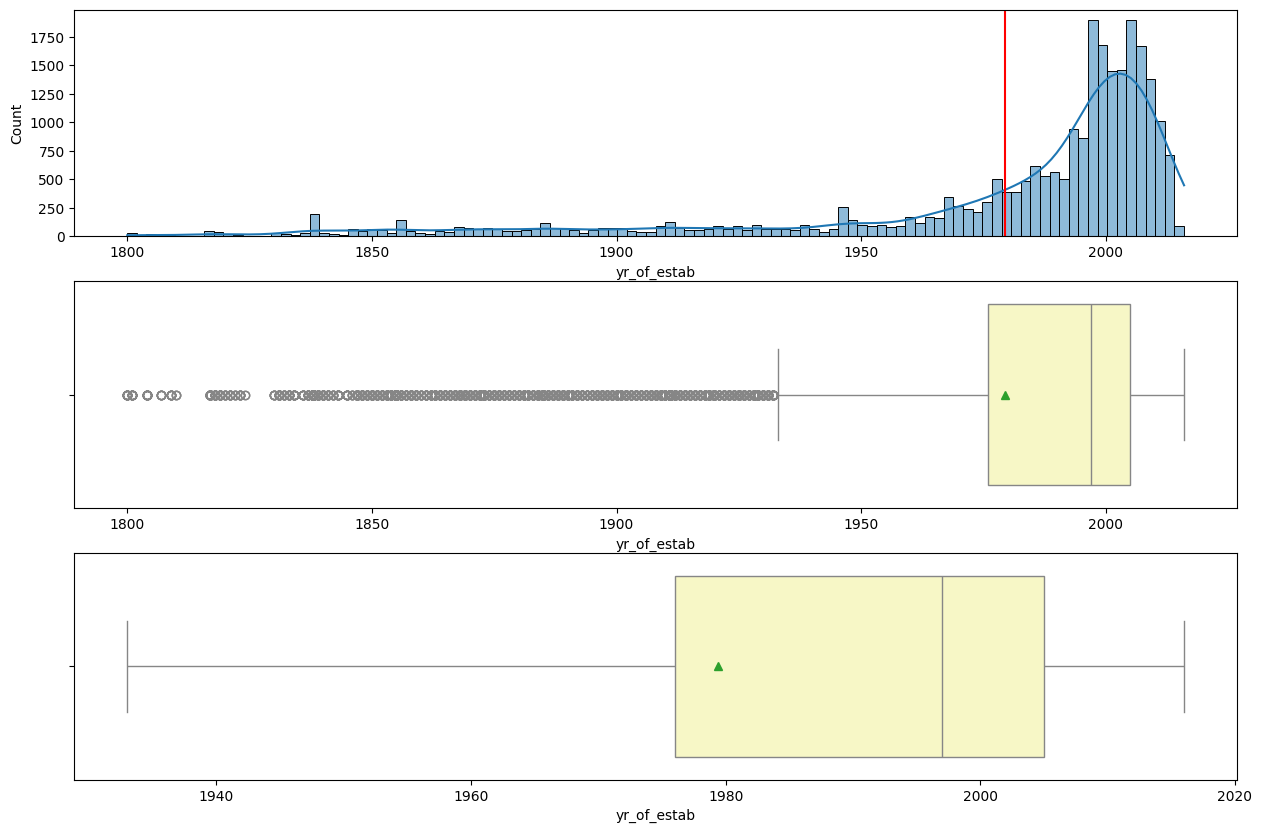

In [ ]:
plot_histogram_countplot_boxplot("yr_of_estab", histplot=True)

Majority of the hiring has happened after 1900s and the the peak happens in 1990s. There has been an upward trend till late 2000s making the distribution very left skewed distribution

### region_of_employment

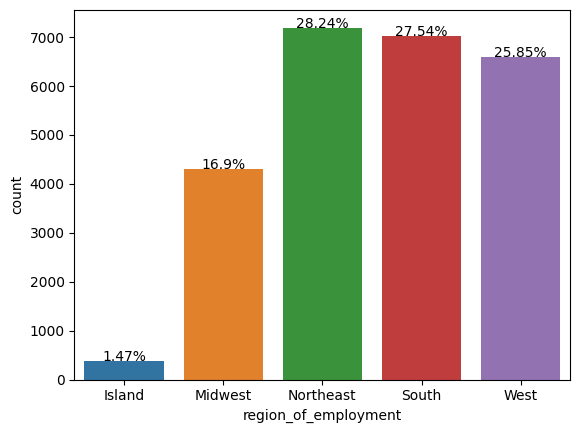

In [ ]:
plot_countplot("region_of_employment", perc=True)

There seems to be an almost equal distribution between Northeast, South and West regions with **Northeast** having the highest share. Midwest and Island regions have the lowest percentage of employment through EasyVisa

### prevailing_wage

<Axes: xlabel='prevailing_wage', ylabel='Count'>

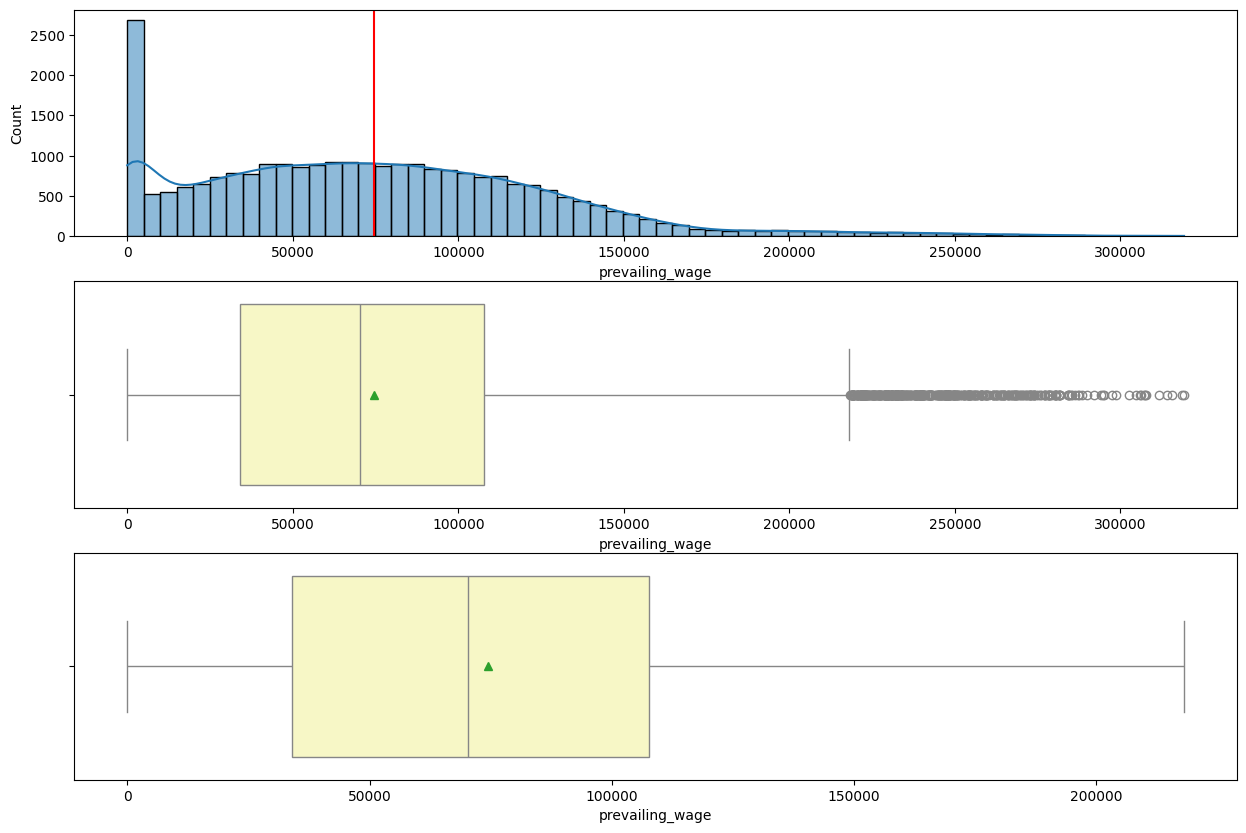

In [ ]:
plot_histogram_countplot_boxplot("prevailing_wage", histplot=True)

The distribution is a normal distribution with the average wage decreasing significantly after $225000.  

### unit_of_wage

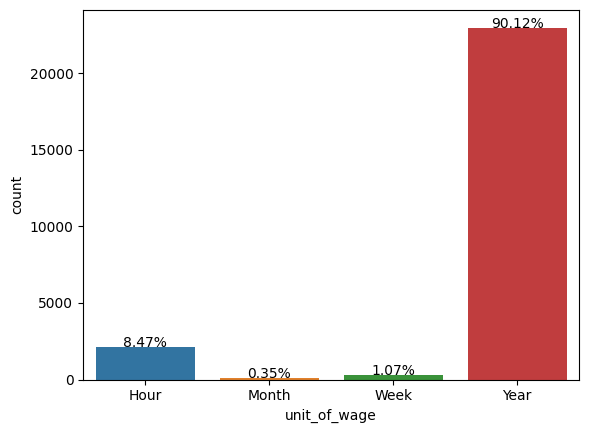

In [ ]:
plot_countplot("unit_of_wage", perc=True)

Many employees are recruited on a yearly basis as these positions provide the highest job security. Employees recruited on an hourly basis follows and would be seen among companies who recruit students. Montly and Weekly recuitments are the least

### full_time_position

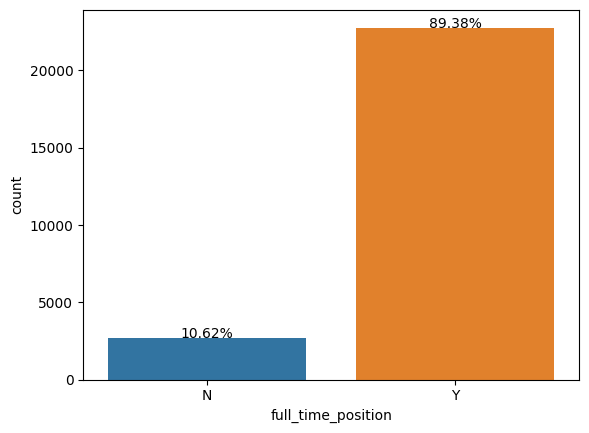

In [ ]:
plot_countplot("full_time_position", perc=True)

As seen with unit_of_wage, majority employees which recruit yearly do give full-time position to their employees. Only **10%** of the recuitment is based Part Time jobs

### case_status

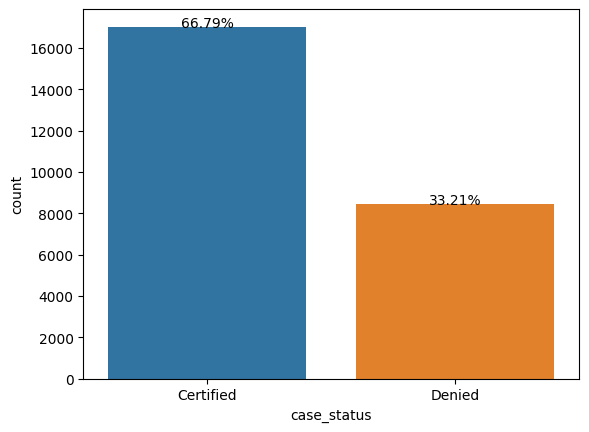

In [ ]:
plot_countplot("case_status", perc=True)

There is a 66:33 ratio of the visas being certified/Denied

## Bivariate Analysis

### Correlation among numerical variables

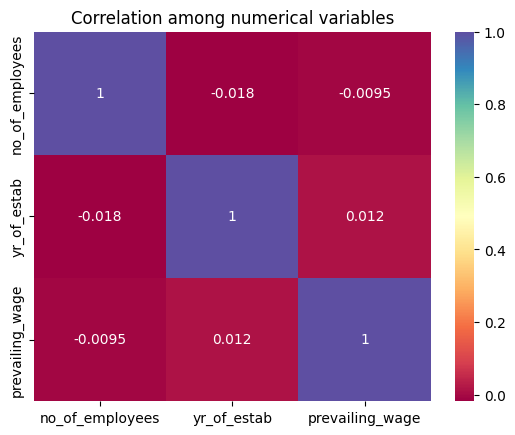

In [ ]:
corr_ = sns.heatmap(data.corr(numeric_only=True),annot=True, cmap="Spectral");
plt.title("Correlation among numerical variables");

As observed in the above heatmap, it is evident that there is no correlation among numerical variables. Hence we can say all the numerical variables are independent of each other

### Pairplot w.r.t. Target Variable(case_status)

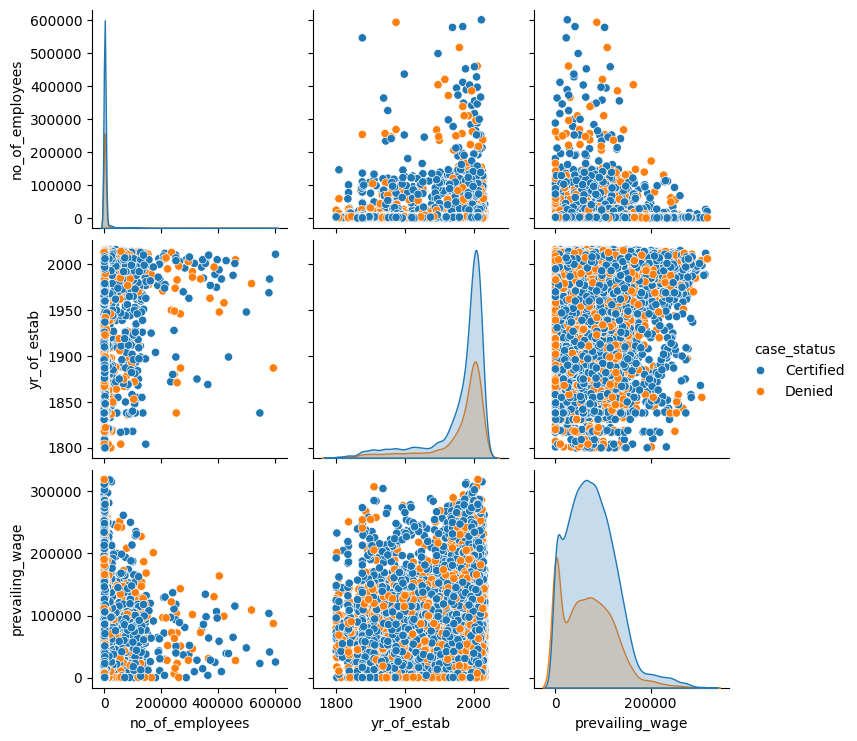

In [ ]:
sns.pairplot(data, hue="case_status");

**The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

As evident from the pairplot above, For rejected people, there is a peak of prevailing wage in the starting ranges indicating that people who are less qualified are recruited on an hourly basis more. \
People who are certified follow a normal distribution indicating as the higher count of people in the average ranges of the prevailing range.

### education_of_employee vs has_job_experience vs requires_job_training

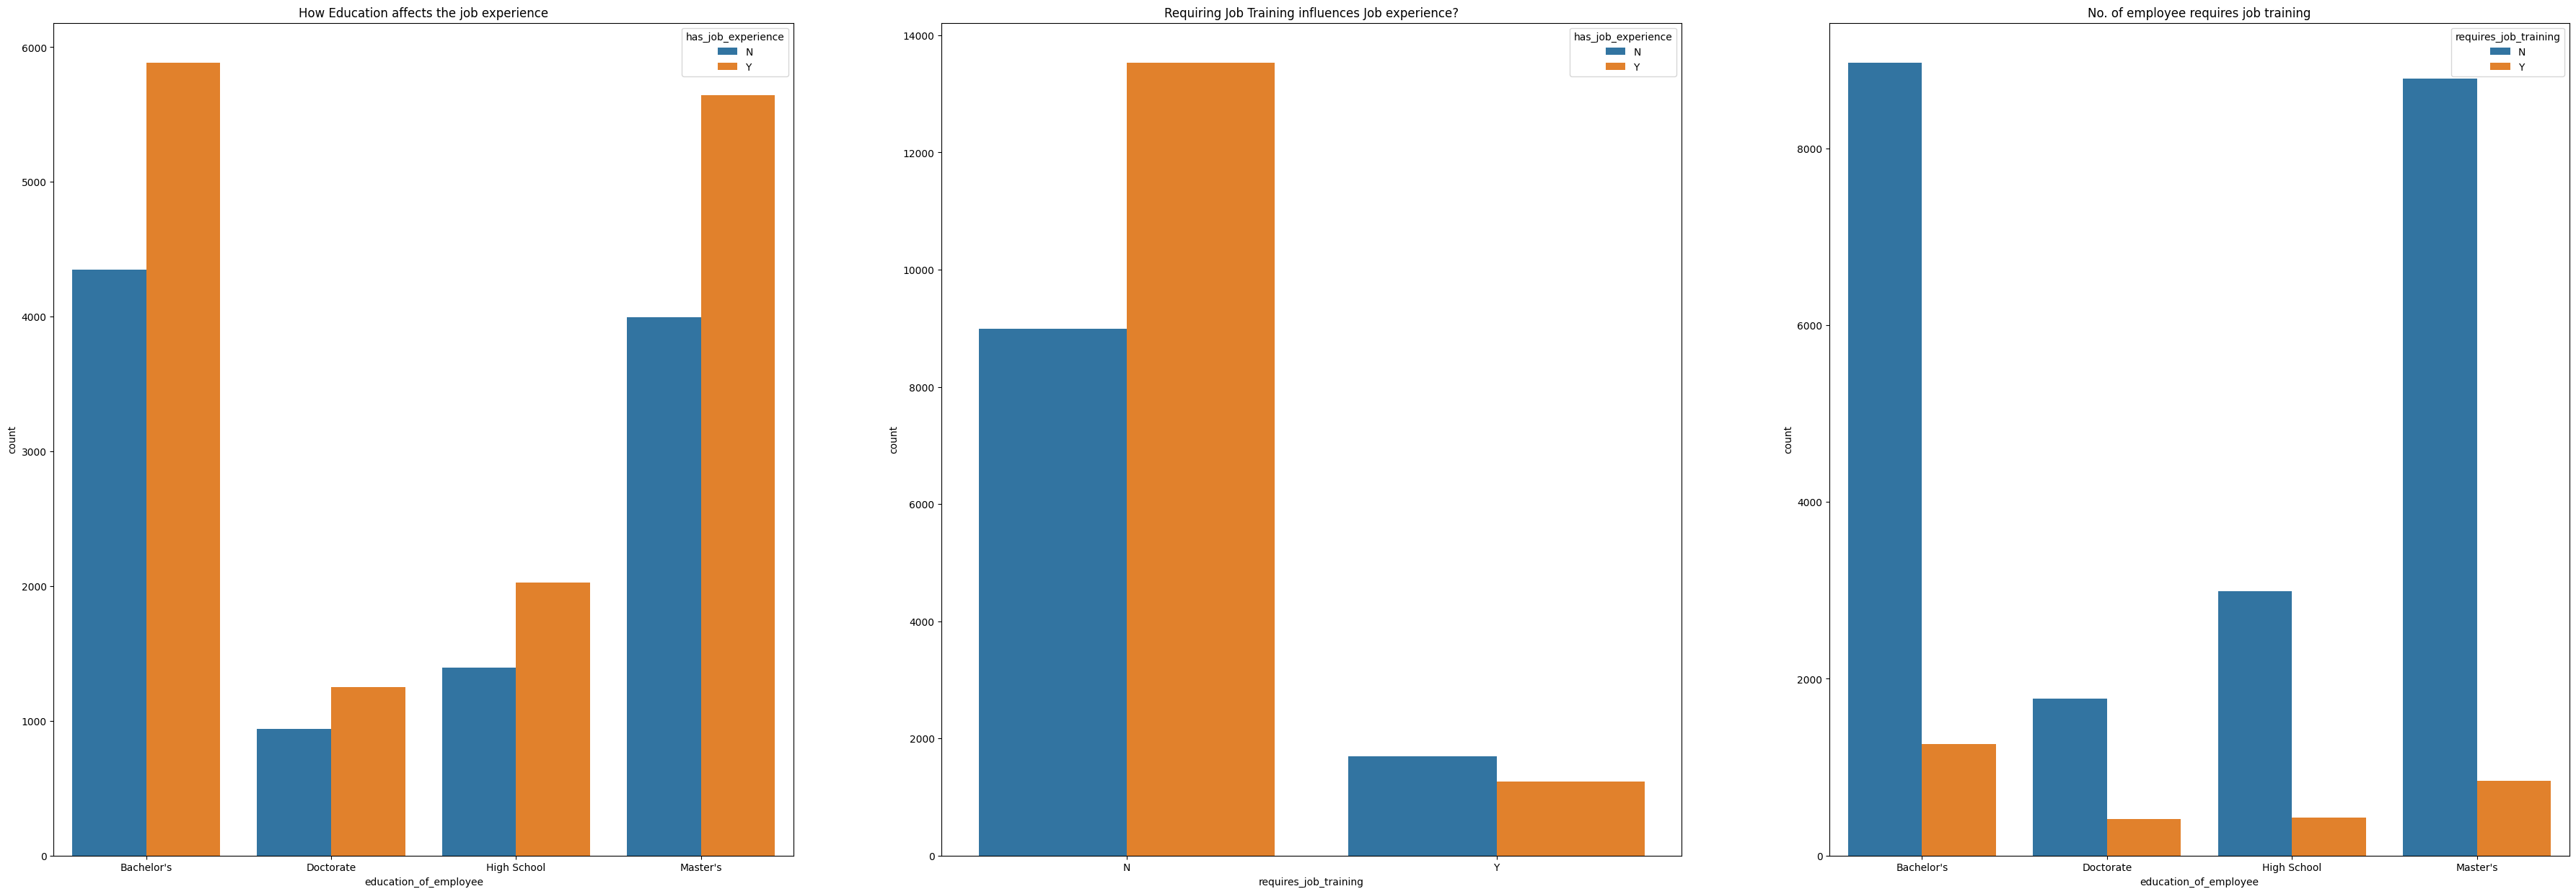

In [ ]:
fig, axes=plt.subplots(1,3,figsize=(45,15))

plt.sca(axes[0])
plt.title("How Education affects the job experience")
plot_countplot("education_of_employee", hue="has_job_experience")

plt.sca(axes[1])
plt.title("Requiring Job Training influences Job experience?")
plot_countplot("requires_job_training", hue="has_job_experience")

plt.sca(axes[2])
plt.title("No. of employee requires job training")
plot_countplot("education_of_employee", hue="requires_job_training")

As expected, people who have job experience tend to have some sort of better education as well. \
People who have job experience, also do not require job training as visible from the plot above \
Also visible is the fact that people who are very well educated also do not require job training

no_of_employees vs region_of_employment

<Axes: xlabel='no_of_employees', ylabel='Count'>

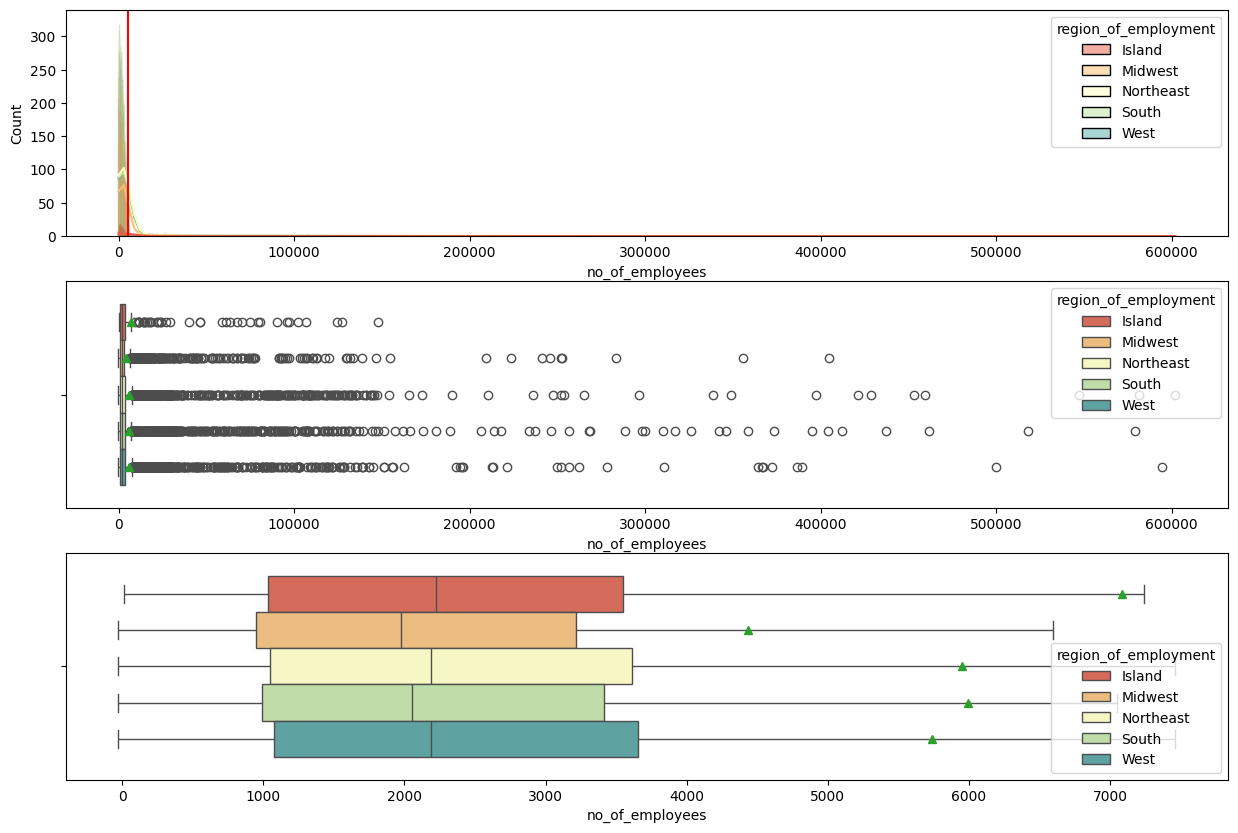

In [ ]:
plot_histogram_countplot_boxplot("no_of_employees", hue="region_of_employment", histplot=True)

Number of employees are around the same range for all region however, Northwest and South regions have the most outlier i.e. These regions have had recruitments that was very high from some employees

### prevailing_wage vs unit_of_wage

<Axes: xlabel='prevailing_wage', ylabel='Count'>

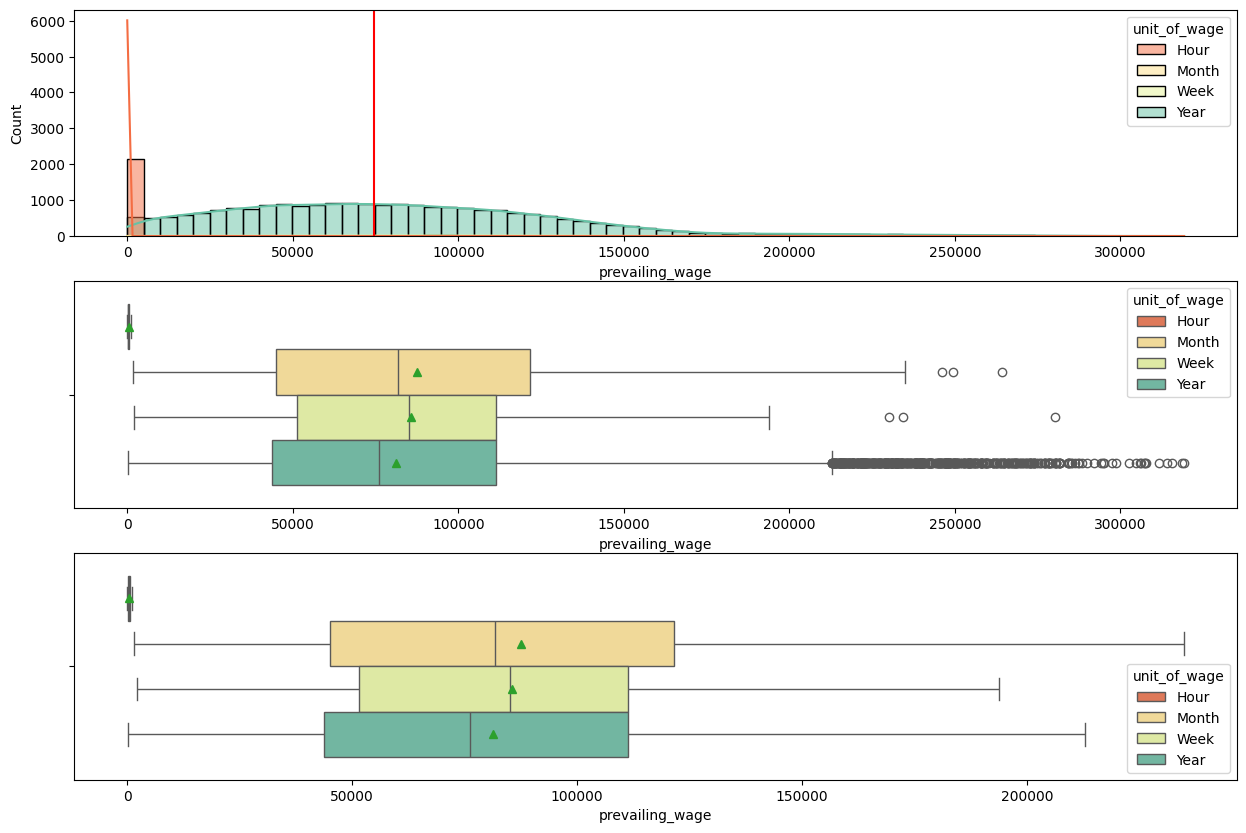

In [ ]:
plot_histogram_countplot_boxplot("prevailing_wage", hue="unit_of_wage", histplot=True)

Let's explore the prevailing wage for Hourly jobs since the hourly wage is not visible

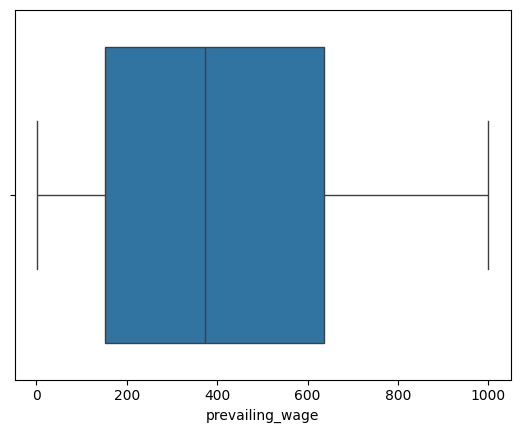

In [ ]:
sns.boxplot(data[data["unit_of_wage"]=="Hour"], x="prevailing_wage");

There are many outliers for the yearly recruitments. This may be because of a variable range in the employment. \
Hourly employment only ranges betweem \$0 and \$1000 with no outliers. \
The median of all the wages also lie with the same ranges.

### continent vs case_status
**How does the visa status vary across different continents?**

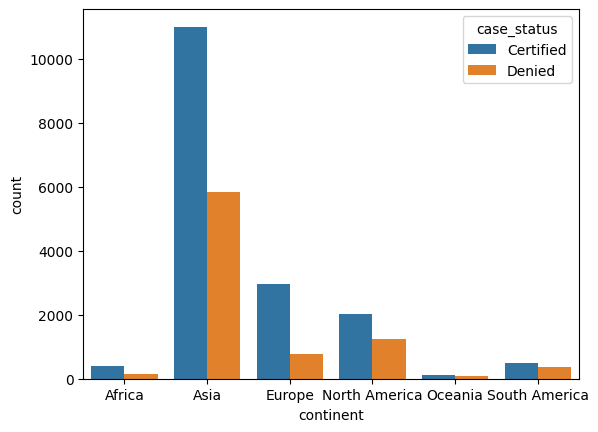

In [ ]:
plot_countplot("continent", hue="case_status")

Majority of the visa is applied from Asia hence it has the highest number of Rejection as well as Certifications. \
Among all the continents, The Number of Certifications are more than the Denial Cases. \
There is very negligible difference between the Oceania and South America in terms of there Ceritification and Denial rates

### education_of_employee vs case_status
**Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

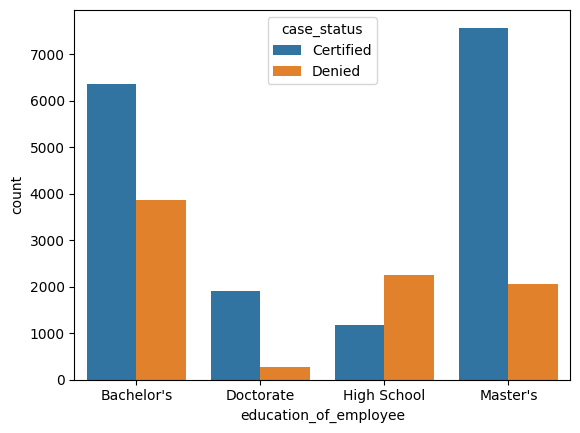

In [ ]:
plot_countplot("education_of_employee", hue="case_status")

Education seems play a role in Visa Certification since the more educated you are, the visa is less likely to get rejected

### has_job_experience vs case_status
**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

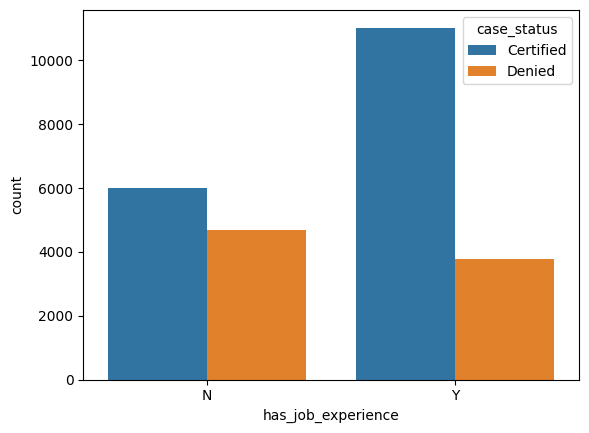

In [ ]:
plot_countplot("has_job_experience", hue="case_status")

Cases where the applicants have job experience, the rejection rates are much lower than for the applicants who don't have any job experience.

### requires_job_training vs case_status

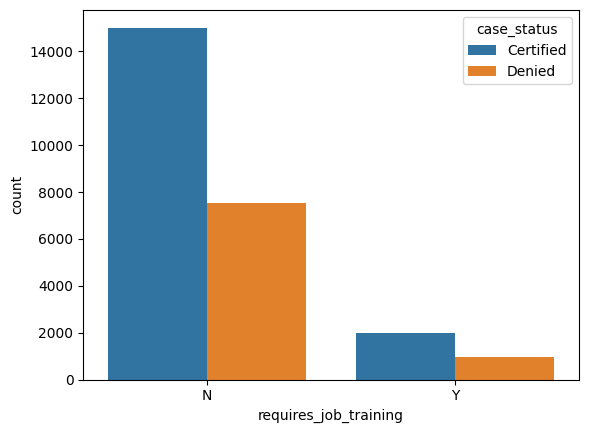

In [ ]:
plot_countplot("requires_job_training", hue="case_status")

The Ratio of Certification:Denial is higher for people who don't require job training and lower for people who require job training. \
Employers require people who don't require job training since it is an extra expenditure which is reflected in the plot above.


###  region_of_employment vs case_status

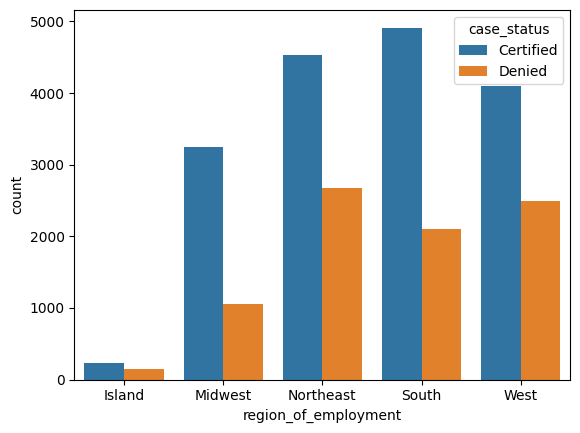

In [ ]:
plot_countplot("region_of_employment", hue="case_status")

The highest certification is provided to the people coming from South and Northeast areas.
People from the Island area are more likely to get denied for visa

### unit_of_wage vs case_status
**In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

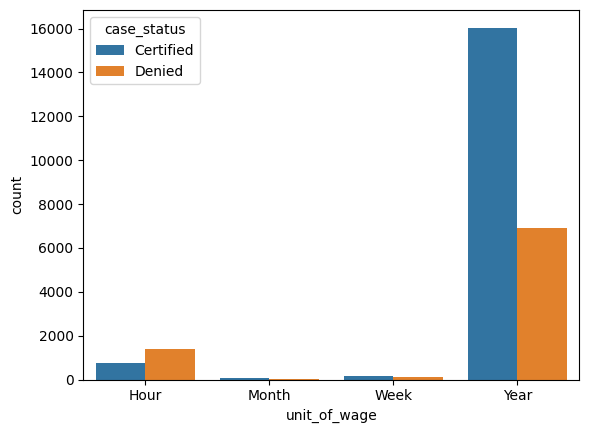

In [ ]:
plot_countplot("unit_of_wage", hue="case_status")

As There is a certainty with people who are recruited on yearly basis. The rejection rate is lower in case of the yearly recuitments vs any other recruitments

### full_time_position vs case_status

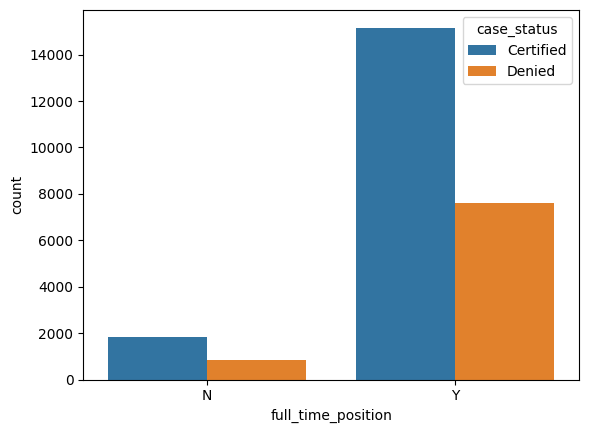

In [ ]:
plot_countplot("full_time_position", hue="case_status")

Full Time Position are more likely to get certified than part-time position

# Data Preparation

In [ ]:
## Droping Case id and Case status for Training data
raw_X = data.drop(columns = ["case_id", "case_status"])

## Replacing Case Status column with 0 and 1
Y = data["case_status"].replace({"Certified":1, "Denied":0})

## Outlier Detection and Treatment

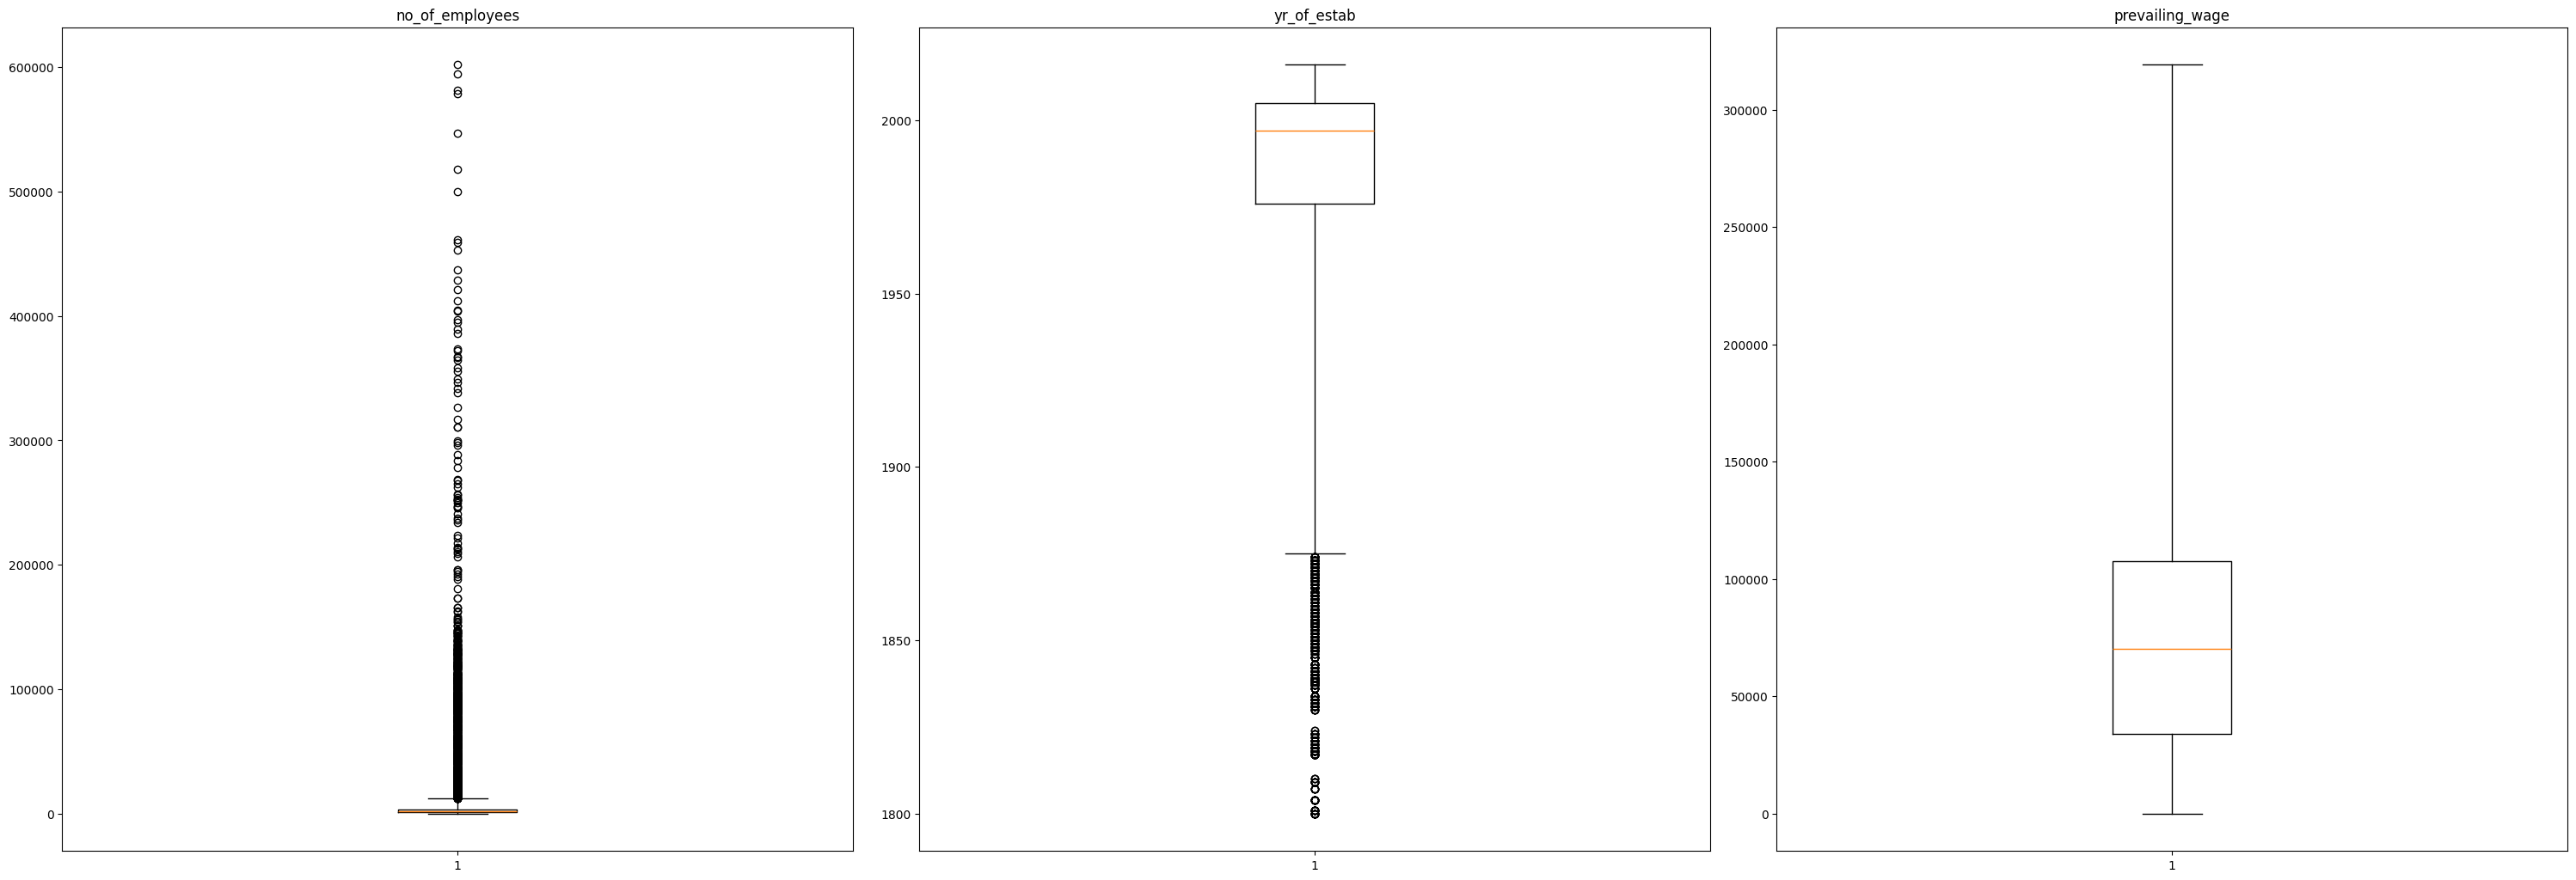

In [ ]:
plt.figure(figsize=(50, 50))
num_col_list = data.select_dtypes(include=["number"]).columns

for i, variable in enumerate(num_col_list):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(data[variable], whis=3.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are many outliers and treating them would alter the nature of the data, hence no outlier treatment will be carried out

## Encoding categorical variables

In [ ]:
cat_col_list = raw_X.select_dtypes(include=["object", "category"]).columns
cat_col_list

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position'],
      dtype='object')

In [ ]:
X = pd.get_dummies(raw_X, drop_first=True, dtype=int)

## Data Scaling

In [ ]:
## Scaling the Data using Z-score Scaler
scaler = StandardScaler()

scaler.fit(X[num_col_list])
X[num_col_list] = scaler.transform(X[num_col_list])

## Splitting Data into Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


# Model Building

### Model Evalution

In [ ]:
def calculate_metrics_and_confusion_matrix(model, test_set, target, metrics=True, cm_=False, labels=None):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    test_set: independent variables
    target: dependent variable
    """
    y_pred = model.predict(test_set)

    if metrics:
      acc = accuracy_score(target, y_pred)  # to compute Accuracy
      recall = recall_score(target, y_pred)  # to compute Recall
      precision = precision_score(target, y_pred)  # to compute Precision
      f1 = f1_score(target, y_pred)  # to compute F1-score

      df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0])
      return df_perf

    if cm_:
      if labels is None:
            labels = np.unique(target)

      cm = confusion_matrix(target, y_pred, labels=np.arange(len(labels)))

      cm_percent = cm / cm.sum() * 100  # Percentage of each cell
      cm_labels = np.array(
          [
              [f"{int(count)}\n({percent:.2f}%)" for count, percent in zip(row, row_percent)]
              for row, row_percent in zip(cm, cm_percent)
          ]
      )

      # Plot confusion matrix
      sns.heatmap(cm, annot=cm_labels, fmt="", cmap="Blues", xticklabels=labels, yticklabels=labels)
      plt.ylabel("True label")
      plt.xlabel("Predicted label")
      plt.title("Confusion Matrix with Percentages")
      plt.show()



def get_metrics_and_display_cm(model):
  df_train = calculate_metrics_and_confusion_matrix(model, test_set=X_train, target=y_train, metrics=True)
  print("Train Confusion Matrix")
  display(calculate_metrics_and_confusion_matrix(model, test_set=X_train, target=y_train, metrics=False, cm_=True, labels=["Denied", "Certified"]))

  df_test = calculate_metrics_and_confusion_matrix(model, test_set=X_test, target=y_test, metrics=True)
  print("Test Confusion Matrix")
  display(calculate_metrics_and_confusion_matrix(model, test_set=X_test, target=y_test, metrics=False, cm_=True, labels=["Denied", "Certified"]))

  return df_train,df_test

# Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.6622187336473051


Train Confusion Matrix


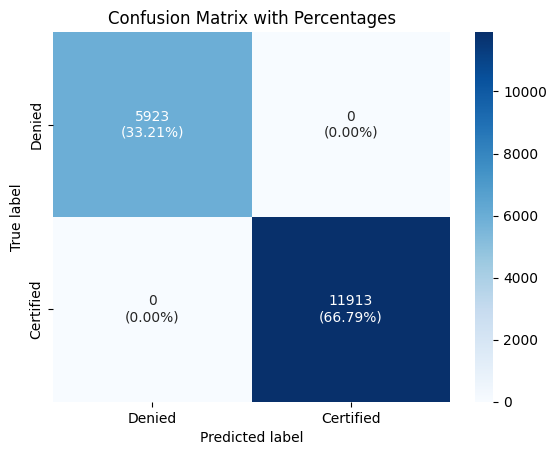

None

Test Confusion Matrix


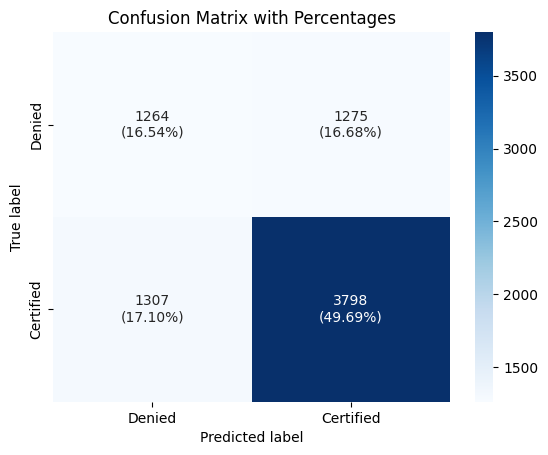

None

In [ ]:
dTree_df_train, dTree_df_test = get_metrics_and_display_cm(model=dTree)

The Training Accuracy is very high and the test accuracy is very low indicating there is very high overfitting.
By Changing the depth of model, we can avoid overfitting

### **Visualizing the Decision Tree**

In [ ]:
train_char_label = ['Denied', 'Certified']
Visa_File = open('visa_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Visa_File, feature_names = list(X_train), class_names = list(train_char_label))
Visa_File.close()

In [ ]:
retCode = system("dot -Tpng visa_tree.dot -o visa_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("visa_tree.png"))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dTree_impF = pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns)
dTree_impF.sort_values("Imp", ascending=False)[:5]

,Imp
prevailing_wage,0.265386
no_of_employees,0.251341
yr_of_estab,0.175349
education_of_employee_High School,0.078179
has_job_experience_Y,0.045682


### Reducing OverFitting by Regularization (Max_Depth=3)

In [ ]:
dTreeR_3 = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=3)
dTreeR_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
print(dTreeR_3.score(X_train, y_train))
print(dTreeR_3.score(X_test, y_test))

0.7302646333258578
0.7229199372056515


Train Confusion Matrix


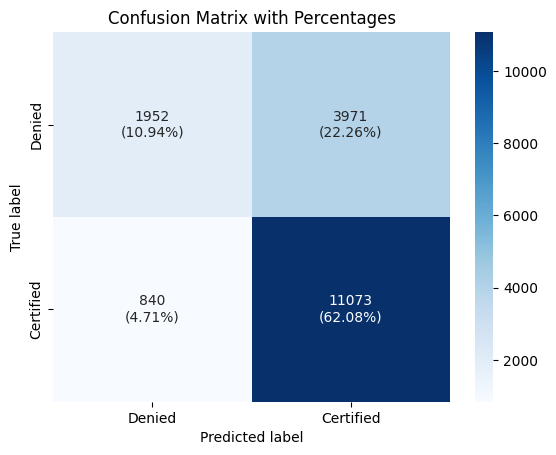

None

Test Confusion Matrix


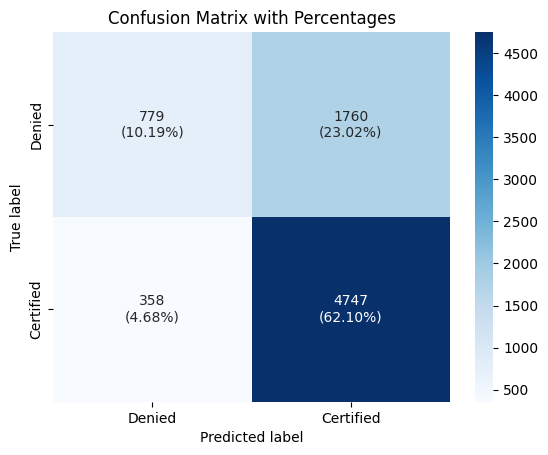

None

In [ ]:
dTreeR_3_df_train, dTreeR_3_df_test = get_metrics_and_display_cm(model=dTreeR_3)

In [ ]:
dTreeR_3_impF = pd.DataFrame(dTreeR_3.feature_importances_, columns = ["Imp"], index = X_train.columns)
dTreeR_3_impF.sort_values("Imp", ascending=False)[:5]

,Imp
education_of_employee_High School,0.497857
has_job_experience_Y,0.262740
prevailing_wage,0.124606
education_of_employee_Master's,0.080911
continent_Asia,0.018864


### Reducing OverFitting by Regularization (Max_Depth=9)

In [ ]:
dTreeR_9 = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=9)
dTreeR_9.fit(X_train, y_train)

print(dTreeR_9.score(X_train, y_train))
print(dTreeR_9.score(X_test, y_test))

0.7673245122224714
0.7306384092098378


Train Confusion Matrix


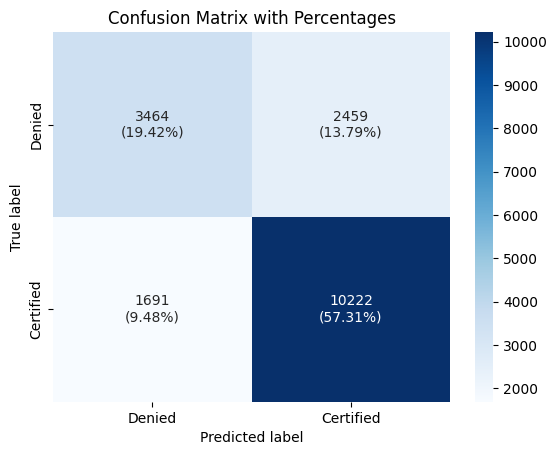

None

Test Confusion Matrix


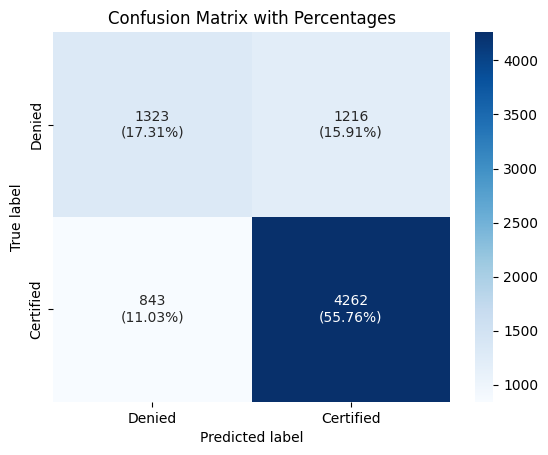

None

In [ ]:
dTreeR_9_df_train, dTreeR_9_df_test = get_metrics_and_display_cm(model=dTreeR_9)

In [ ]:
dTreeR_9_impF = pd.DataFrame(dTreeR_9.feature_importances_, columns = ["Imp"], index = X_train.columns)
dTreeR_9_impF.sort_values("Imp", ascending=False)[:5]

,Imp
education_of_employee_High School,0.264495
prevailing_wage,0.159594
has_job_experience_Y,0.146713
no_of_employees,0.069210
education_of_employee_Master's,0.055608


### Reducing OverFitting by Regularization and Pruning (Max_Depth=9, min_samples_leaf=5)

In [ ]:
dTreeR_9_5 = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=9, min_samples_leaf=5)
dTreeR_9_5.fit(X_train, y_train)

print(dTreeR_9_5.score(X_train, y_train))
print(dTreeR_9_5.score(X_test, y_test))

0.7625588697017268
0.7259288330716902


Train Confusion Matrix


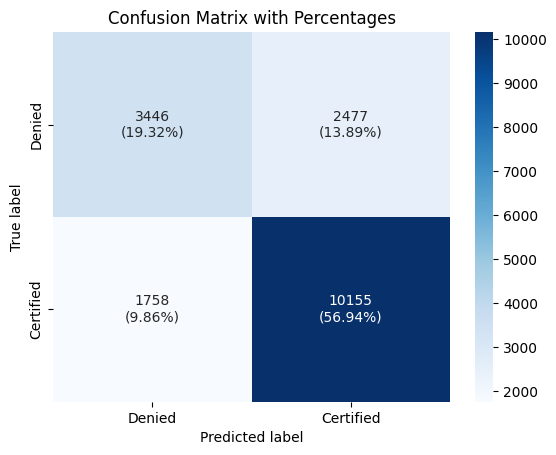

None

Test Confusion Matrix


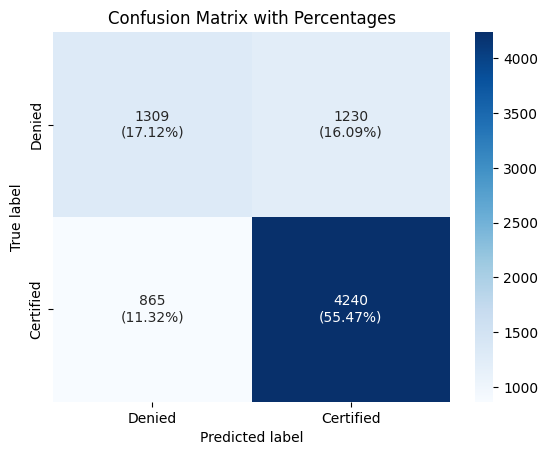

None

In [ ]:
dTreeR_9_5_df_train, dTreeR_9_5_df_test = get_metrics_and_display_cm(model=dTreeR_9_5)

In [ ]:
dTreeR_9_5_impF = pd.DataFrame(dTreeR_9_5.feature_importances_, columns = ["Imp"], index = X_train.columns)
dTreeR_9_5_impF.sort_values("Imp", ascending=False)[:5]

,Imp
education_of_employee_High School,0.273769
prevailing_wage,0.164375
has_job_experience_Y,0.151414
education_of_employee_Master's,0.057558
no_of_employees,0.055387


As seen from the above Hyperparameter Tuning, Decision Tree with a **max_depth=9** and Pruning with **min_samples_leaf=5** gives the best result among all Decision Tree Models

In [ ]:
train_char_label = ['Denied', 'Certified']
Visa_TreeHP_File = open('visa_tree_tuned.dot','w')
dot_data = export_graphviz(dTree, out_file=Visa_TreeHP_File, feature_names = list(X_train), class_names = list(train_char_label))
Visa_TreeHP_File.close()

retCode = system("dot -Tpng visa_tree_tuned.dot -o visa_tree_tuned.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("visa_tree_tuned.png"))

Output hidden; open in https://colab.research.google.com to view.

# Bagging

## Bagging with base model (Decision Tree)

In [ ]:
bgcl = BaggingClassifier(random_state=42)
bgcl.fit(X_train, y_train)
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

0.9842453464902444
0.6942700156985872


Train Confusion Matrix


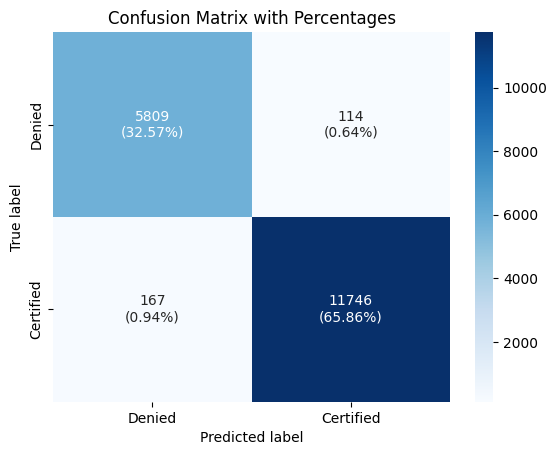

None

Test Confusion Matrix


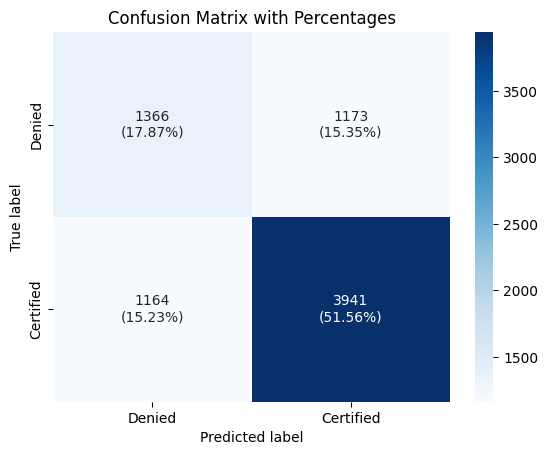

None

In [ ]:
bgcl_df_train, bgcl_df_test = get_metrics_and_display_cm(model=bgcl)

The Training Accuracy is very high and the test accuracy is very low indicating there is very high overfitting. By hyperparameter tuning, we can avoid overfitting

## Hyperparameter tuning for Bagging-Decision Tree

In [ ]:
# parameter_dict = {'max_samples': [0.7,0.8,0.9,1],
#               'max_features': [0.7,0.8,0.9,1],
#               'n_estimators' : [10,20,30,40,50],
#              }

0.9807131643866338
0.7136316064887493
Train Confusion Matrix


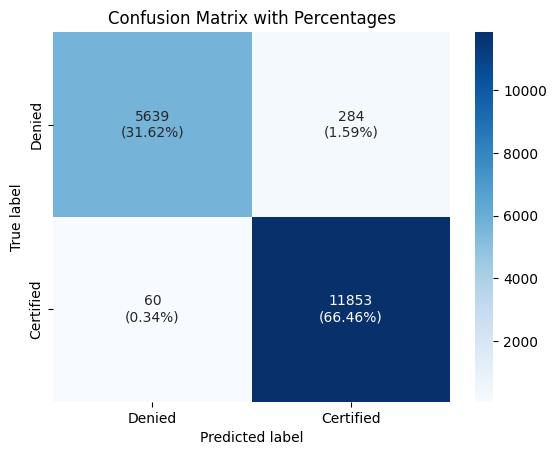

None

Test Confusion Matrix


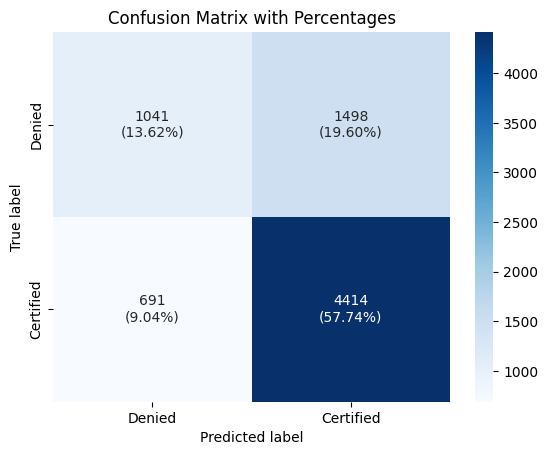

None

In [ ]:
bgcl2 = BaggingClassifier(max_samples=0.7, max_features=0.7, n_estimators=20, random_state=42)
bgcl2.fit(X_train, y_train)
print(bgcl2.score(X_train, y_train))
print(bgcl2.score(X_test, y_test))
bgcl2_df_train, bgcl2_df_test = get_metrics_and_display_cm(model=bgcl2)

0.9938887642969275
0.7213500784929356
Train Confusion Matrix


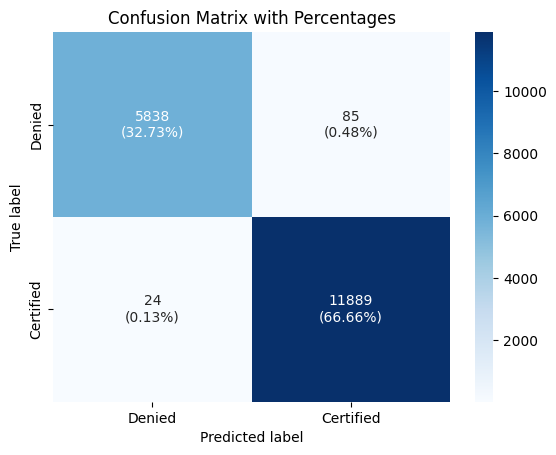

None

Test Confusion Matrix


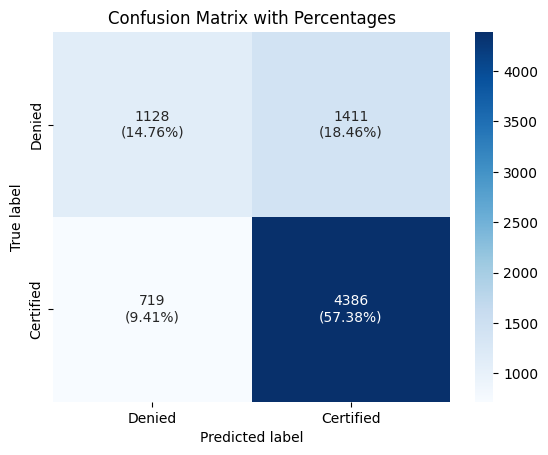

None

In [ ]:
bgcl3 = BaggingClassifier(max_samples=0.8, max_features=0.8, n_estimators=30, random_state=42)
bgcl3.fit(X_train, y_train)
print(bgcl3.score(X_train, y_train))
print(bgcl3.score(X_test, y_test))
bgcl3_df_train, bgcl3_df_test = get_metrics_and_display_cm(model=bgcl3)

0.977909845256784
0.7135007849293563
Train Confusion Matrix


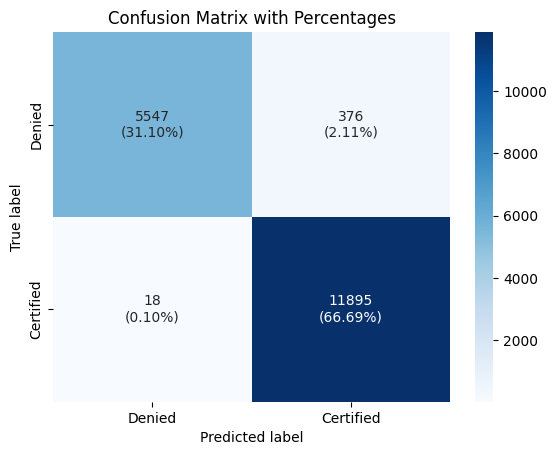

None

Test Confusion Matrix


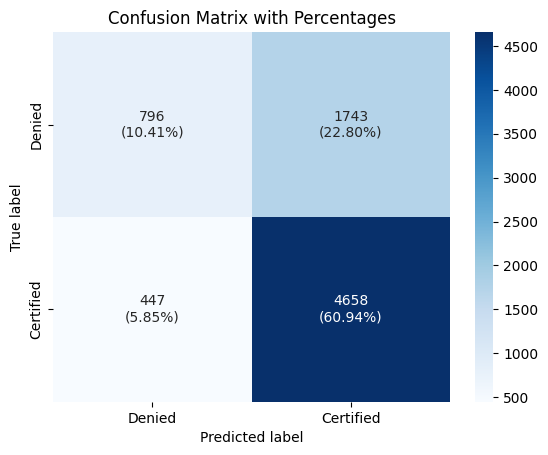

None

In [ ]:
bgcl4 = BaggingClassifier(max_samples=0.7, max_features=0.7, n_estimators=40, random_state=42, bootstrap_features=True)
bgcl4.fit(X_train, y_train)
print(bgcl4.score(X_train, y_train))
print(bgcl4.score(X_test, y_test))
bgcl4_df_train, bgcl4_df_test = get_metrics_and_display_cm(model=bgcl4)

All Bagging Models with Decision Tree models are overfitting even after hyperparameter tuning

## Bagging with base model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
bgcl_lr = BaggingClassifier(estimator = lr(), random_state=42)
bgcl_lr.fit(X_train, y_train)
print(bgcl_lr.score(X_train, y_train))
print(bgcl_lr.score(X_test, y_test))

0.7385063915676161
0.738487702773417


Train Confusion Matrix


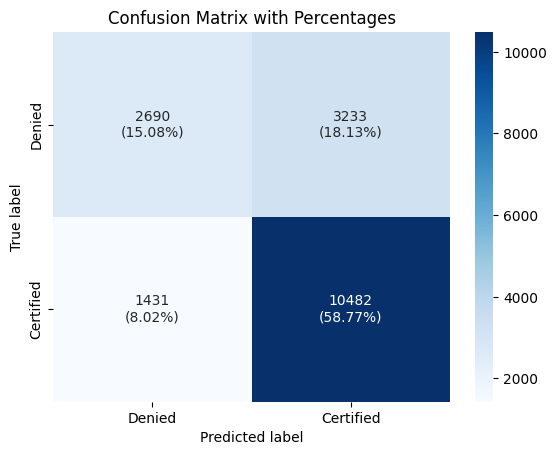

None

Test Confusion Matrix


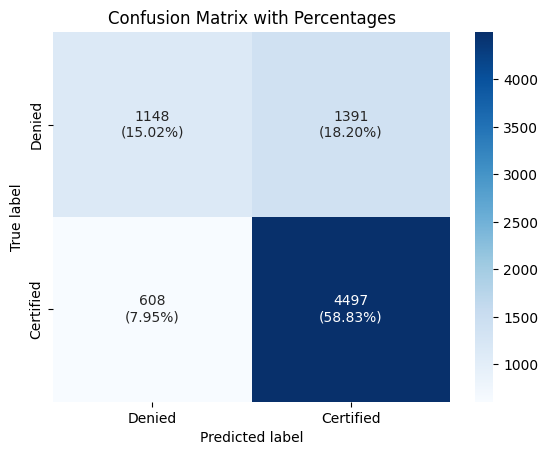

None

In [ ]:
bgcl_lr_df_train, bgcl_lr_df_test = get_metrics_and_display_cm(model=bgcl_lr)

The Training Accuracy and Testing Accuracy is almost same indicating there is no overfitting, however the recall would be slightly lower. Let's do some hyperparameter tuning to improve model performance

## Hyperparameter tuning for Bagging-Logistic Regression model

0.7235927337968154
0.7144165358451072
Train Confusion Matrix


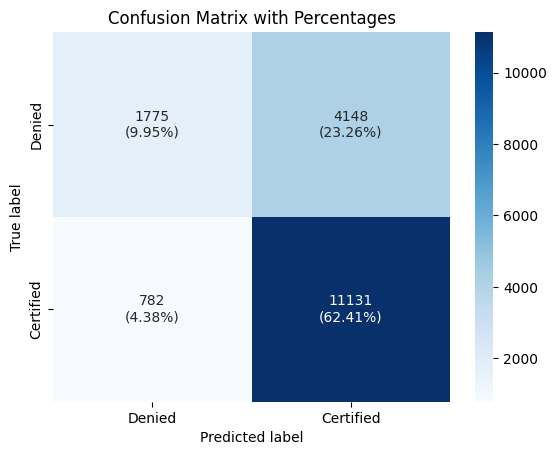

None

Test Confusion Matrix


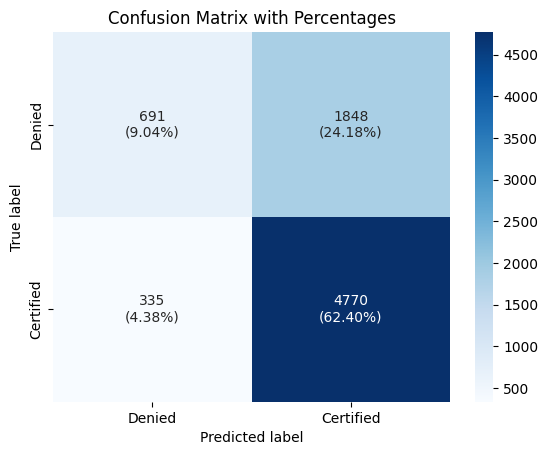

None

In [ ]:
bgcl_lr2 = BaggingClassifier(estimator = lr(), max_samples=0.7, max_features=0.7, n_estimators=20, random_state=42)
bgcl_lr2.fit(X_train, y_train)
print(bgcl_lr2.score(X_train, y_train))
print(bgcl_lr2.score(X_test, y_test))
bgcl_lr2_df_train, bgcl_lr2_df_test = get_metrics_and_display_cm(model=bgcl_lr2)

0.728975106526127
0.7247514390371533
Train Confusion Matrix


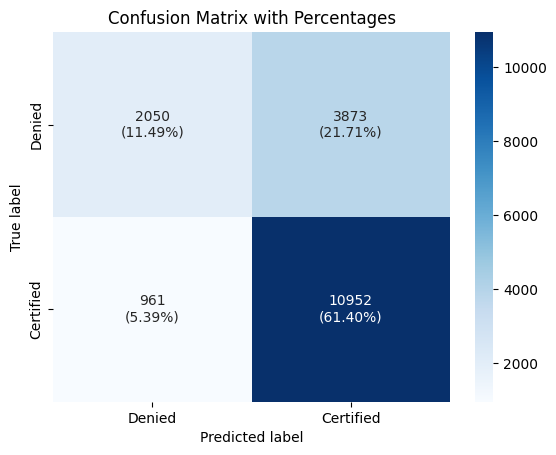

None

Test Confusion Matrix


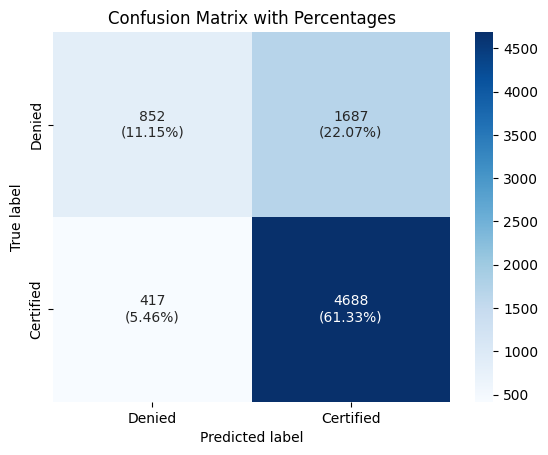

None

In [ ]:
bgcl_lr3 = BaggingClassifier(estimator = lr(), max_samples=0.8, max_features=0.8, n_estimators=30, random_state=42)
bgcl_lr3.fit(X_train, y_train)
print(bgcl_lr3.score(X_train, y_train))
print(bgcl_lr3.score(X_test, y_test))
bgcl_lr3_df_train, bgcl_lr3_df_test = get_metrics_and_display_cm(model=bgcl_lr3)

0.71697690065037
0.7085295656724229
Train Confusion Matrix


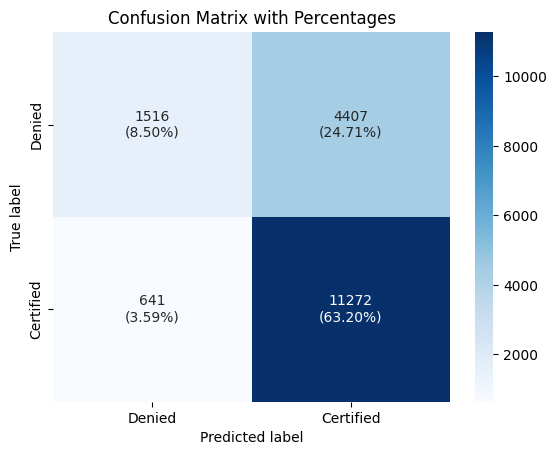

None

Test Confusion Matrix


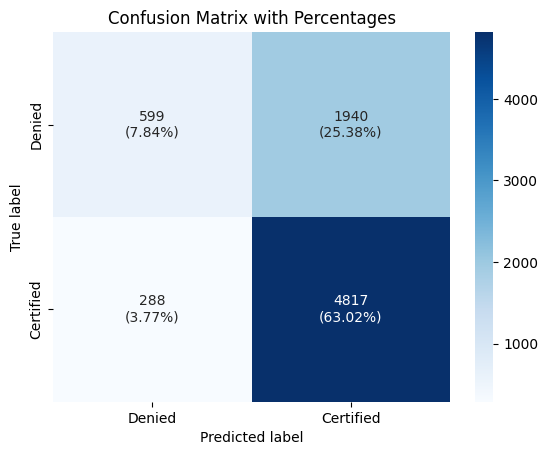

None

In [ ]:
bgcl_lr4 = BaggingClassifier(estimator = lr(), max_samples=0.7, max_features=0.7, n_estimators=40, random_state=42, bootstrap_features=True)
bgcl_lr4.fit(X_train, y_train)
print(bgcl_lr4.score(X_train, y_train))
print(bgcl_lr4.score(X_test, y_test))
bgcl_lr4_df_train, bgcl_lr4_df_test = get_metrics_and_display_cm(model=bgcl_lr4)

Recall has not improved much even using Logistic Regression. Let's try other classifiers

# Random Forest Classifier

1.0
0.7234432234432234
Train Confusion Matrix


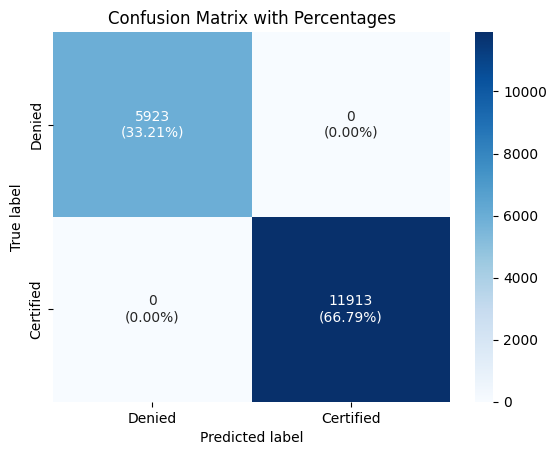

None

Test Confusion Matrix


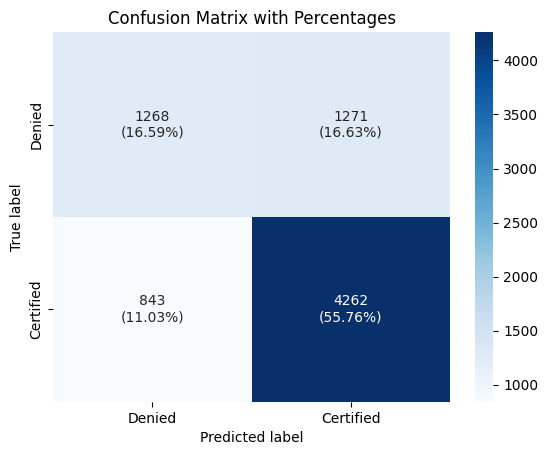

None

In [ ]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))
rfcl_df_train, rfcl_df_test = get_metrics_and_display_cm(model=rfcl)

Random Classifier is also overfitting on the data. We can do hyperparameter tuning to improve the performance of the model

## Hyperparameter tuning for Random Forest Classifier(n_estimators=150, min_samples_leaf=7, max_samples=0.4)

0.7691186364655752
0.7442438513867086
Train Confusion Matrix


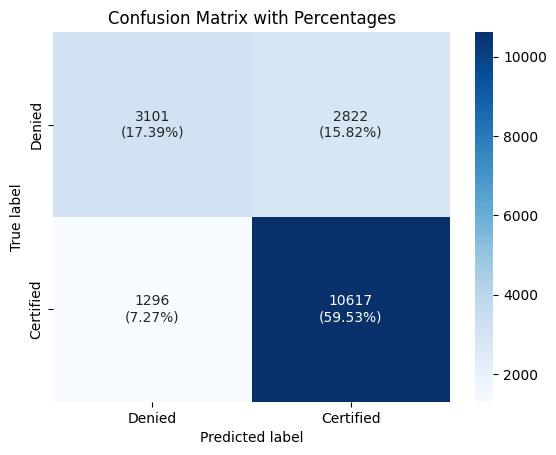

None

Test Confusion Matrix


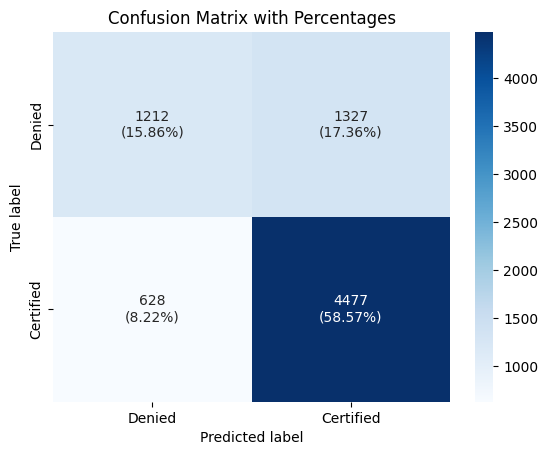

None

In [ ]:
rfcl2 = RandomForestClassifier(n_estimators=150, min_samples_leaf=7, max_samples=0.4)
rfcl2.fit(X_train, y_train)
print(rfcl2.score(X_train, y_train))
print(rfcl2.score(X_test, y_test))
rfcl2_df_train, rfcl2_df_test = get_metrics_and_display_cm(model=rfcl2)

## Hyperparameter tuning for Random Forest Classifier(n_estimators=150, min_samples_leaf=8, max_samples=0.5)

0.7700717649697242
0.7463369963369964
Train Confusion Matrix


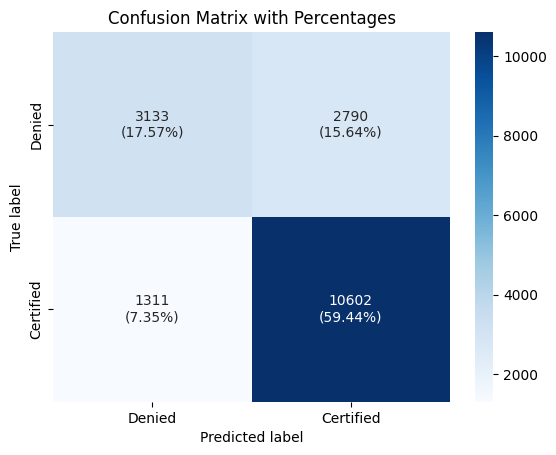

None

Test Confusion Matrix


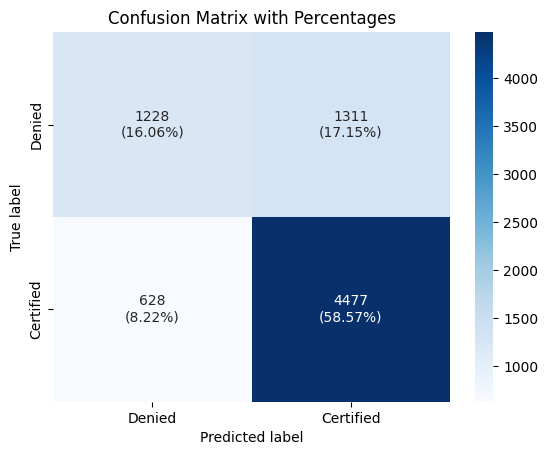

None

In [ ]:
rfcl3 = RandomForestClassifier(n_estimators=150, min_samples_leaf=8, max_samples=0.5)
rfcl3.fit(X_train, y_train)
print(rfcl3.score(X_train, y_train))
print(rfcl3.score(X_test, y_test))
rfcl3_df_train, rfcl3_df_test = get_metrics_and_display_cm(model=rfcl3)

## Hyperparameter tuning for Random Forest Classifier(n_estimators=150, min_samples_leaf=7, max_samples=0.5)

0.7705202960305001
0.7451596023024595
Train Confusion Matrix


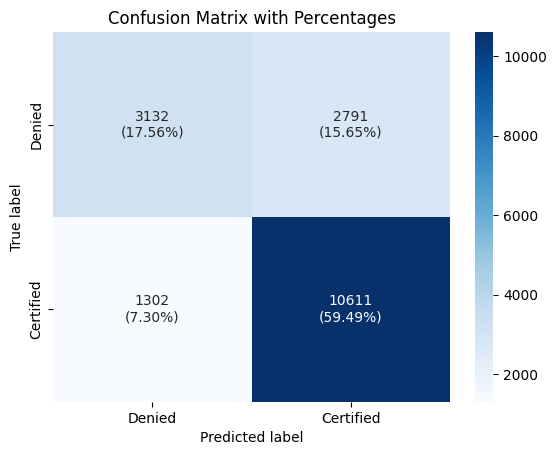

None

Test Confusion Matrix


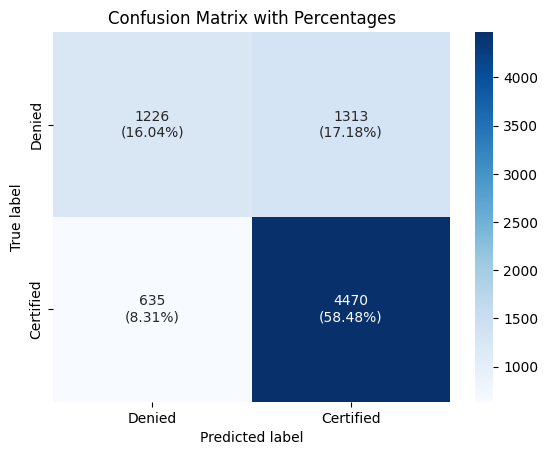

None

In [ ]:
rfcl4 = RandomForestClassifier(n_estimators=150, min_samples_leaf=7, max_samples=0.5)
rfcl4.fit(X_train, y_train)
print(rfcl4.score(X_train, y_train))
print(rfcl4.score(X_test, y_test))
rfcl4_df_train, rfcl4_df_test = get_metrics_and_display_cm(model=rfcl4)

## Hyperparameter tuning for Random Forest Classifier(n_estimators=150, min_samples_leaf=8, max_samples=0.4)

0.7675487777528593
0.7442438513867086
Train Confusion Matrix


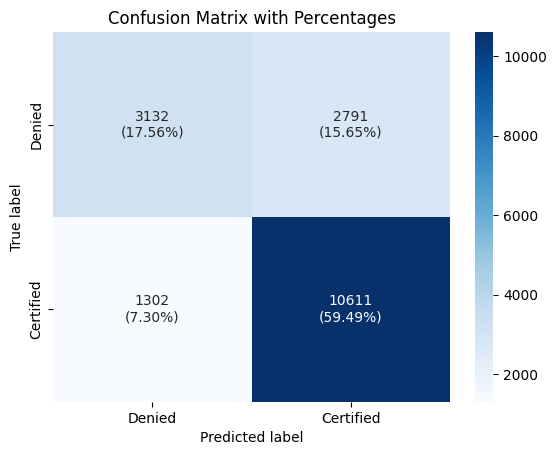

None

Test Confusion Matrix


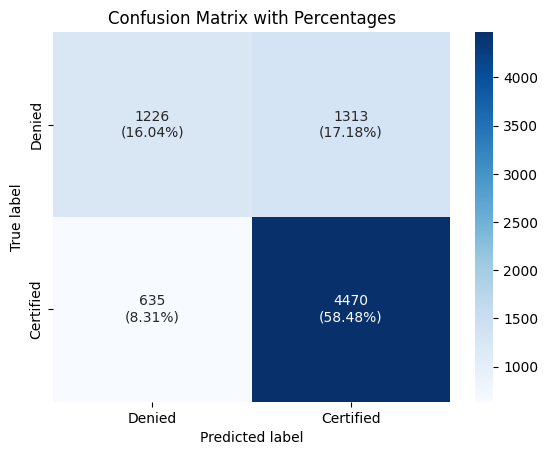

None

In [ ]:
rfcl5 = RandomForestClassifier(n_estimators=150, min_samples_leaf=8, max_samples=0.4)
rfcl5.fit(X_train, y_train)
print(rfcl5.score(X_train, y_train))
print(rfcl5.score(X_test, y_test))
rfcl5_df_train, rfcl5_df_test = get_metrics_and_display_cm(model=rfcl4)

## Hyperparameter tuning for Random Forest Classifier(n_estimators=250, min_samples_leaf=8, max_samples=0.4)

0.7671563130746805
0.7451596023024595
Train Confusion Matrix


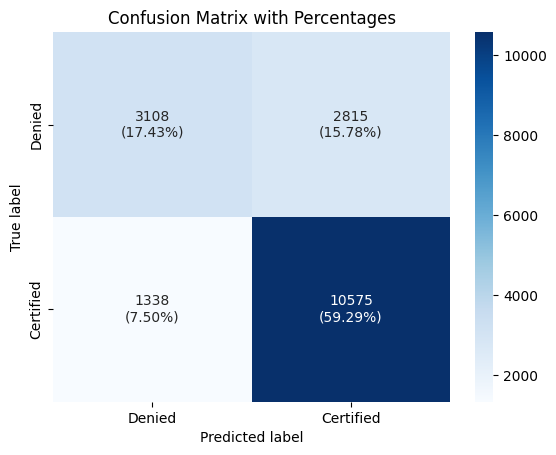

None

Test Confusion Matrix


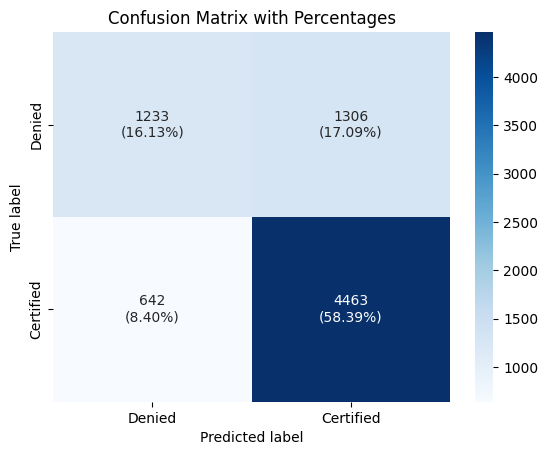

None

In [ ]:
rfcl6 = RandomForestClassifier(n_estimators=250, min_samples_leaf=8, max_samples=0.4)
rfcl6.fit(X_train, y_train)
print(rfcl6.score(X_train, y_train))
print(rfcl6.score(X_test, y_test))
rfcl6_df_train, rfcl6_df_test = get_metrics_and_display_cm(model=rfcl6)

The Accuracy has improved slightly after hyperparameter tuning.

# AdaBoost

0.7380578605068401
0.7329931972789115
Train Confusion Matrix


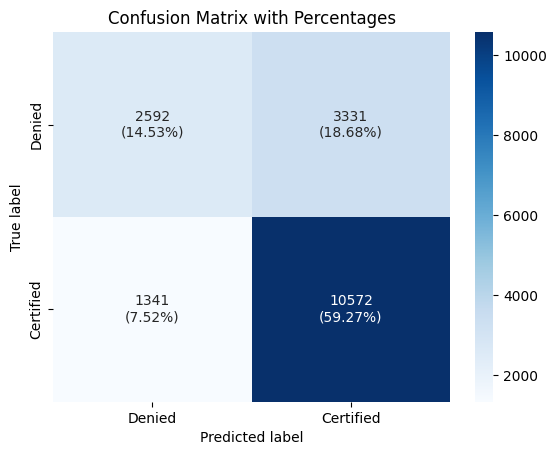

None

Test Confusion Matrix


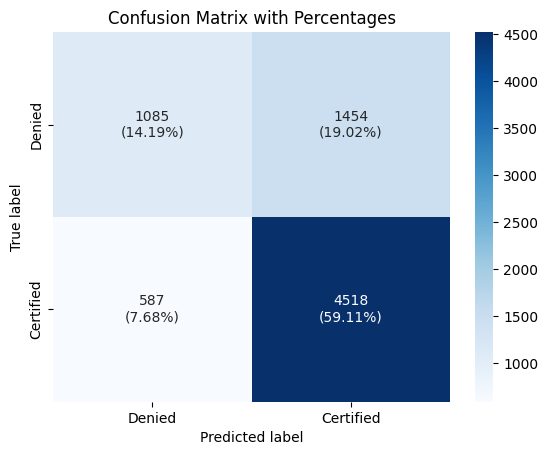

None

In [ ]:
adaB = AdaBoostClassifier(random_state=1)
adaB = adaB.fit(X_train, y_train)
print(adaB.score(X_train, y_train))
print(adaB.score(X_test, y_test))
adaB_df_train, adaB_df_test = get_metrics_and_display_cm(model=adaB)

## AdaBoost with DecisionTree depth 1

0.7380578605068401
0.7329931972789115
Train Confusion Matrix


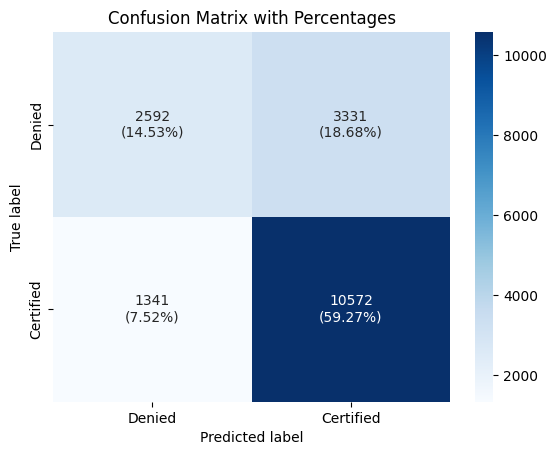

None

Test Confusion Matrix


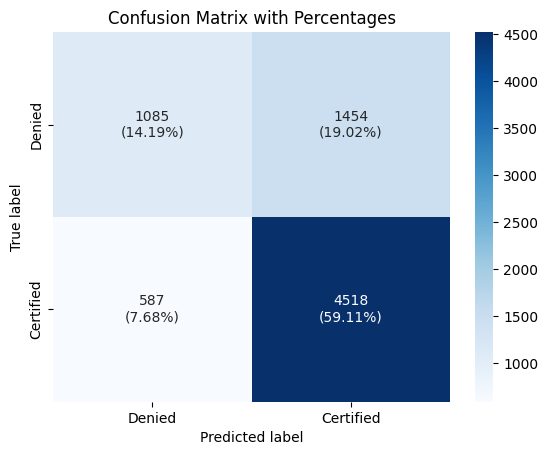

None

In [ ]:
adaB1 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=1)
adaB1 = adaB1.fit(X_train, y_train)
print(adaB1.score(X_train, y_train))
print(adaB1.score(X_test, y_test))
adaB1_df_train, adaB1_df_test = get_metrics_and_display_cm(model=adaB1)

## AdaBoost with DecisionTree depth 3

0.7642969275622337
0.7248822605965463
Train Confusion Matrix


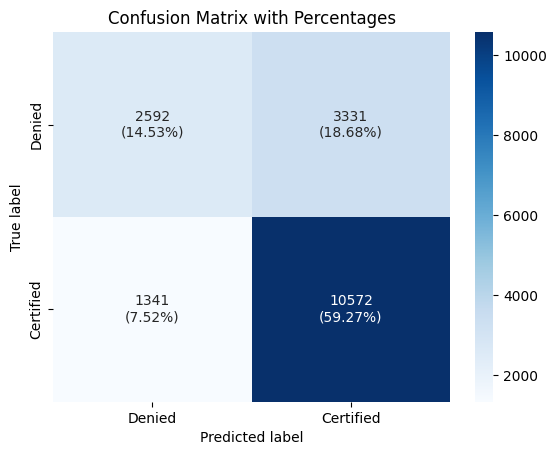

None

Test Confusion Matrix


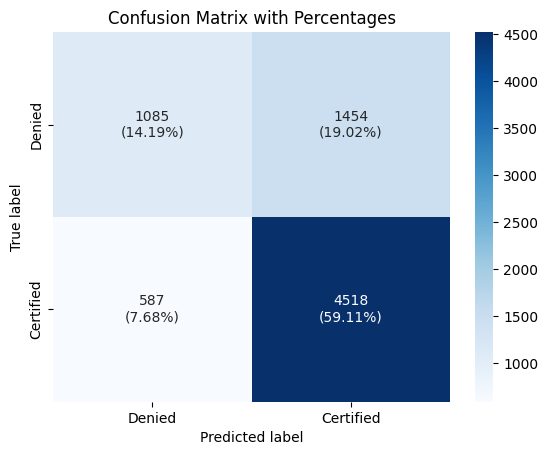

None

In [ ]:
adaB3 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), random_state=1)
adaB3 = adaB3.fit(X_train, y_train)
print(adaB3.score(X_train, y_train))
print(adaB3.score(X_test, y_test))
adaB3_df_train, adaB3_df_test = get_metrics_and_display_cm(model=adaB1)

## AdaBoost with Logistic Regression



0.7334604171338865
0.7294610151753009
Train Confusion Matrix


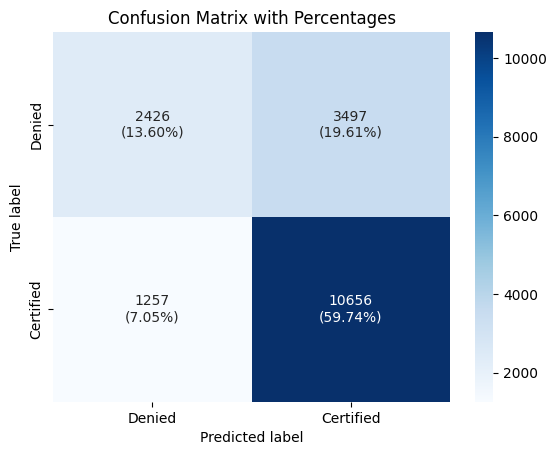

None

Test Confusion Matrix


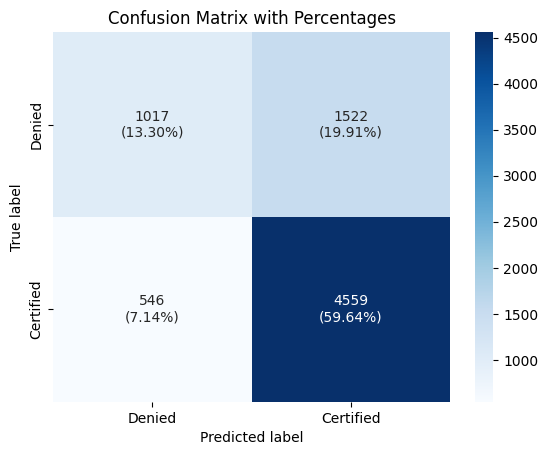

None

In [ ]:
adaB_lr = AdaBoostClassifier(estimator=lr(), random_state=1)
adaB_lr = adaB_lr.fit(X_train, y_train)
print(adaB_lr.score(X_train, y_train))
print(adaB_lr.score(X_test, y_test))
adaB_lr_df_train, adaB_lr_df_test = get_metrics_and_display_cm(model=adaB_lr)

There is no overfitting using AdaBoost however, the accuracy is at 0.73 and there is not much improvement after hyperparamter tuning as well

# Gradient Boosting

0.7554384391119086
0.7431972789115646
Train Confusion Matrix


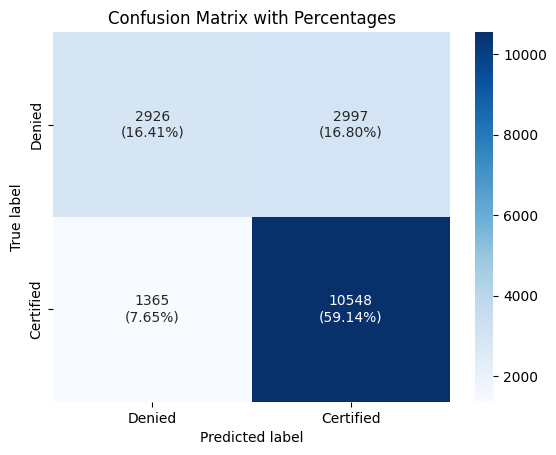

None

Test Confusion Matrix


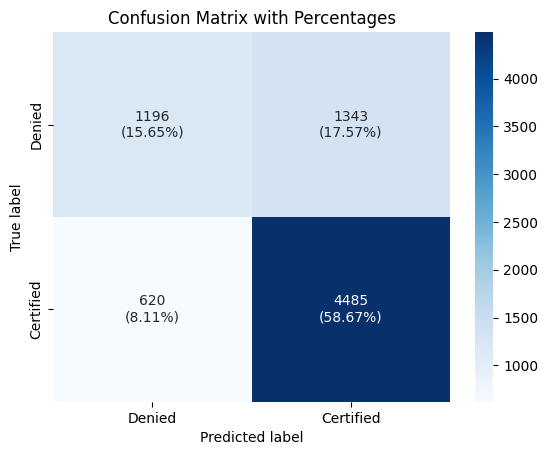

None

In [ ]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))
gbcl_df_train, gbcl_df_test = get_metrics_and_display_cm(model=gbcl)

## Gradient Boosting (n_estimators=100)

0.7594191522762951
0.7446363160648874
Train Confusion Matrix


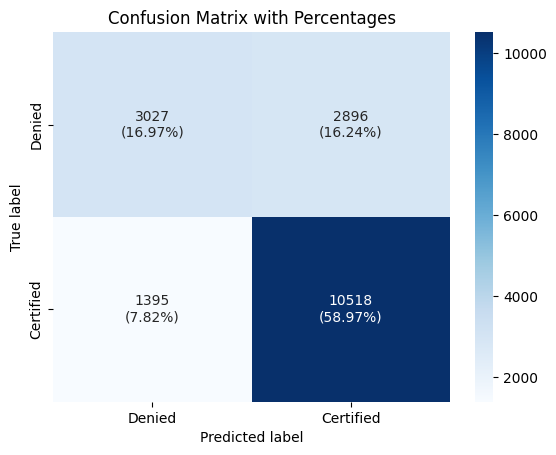

None

Test Confusion Matrix


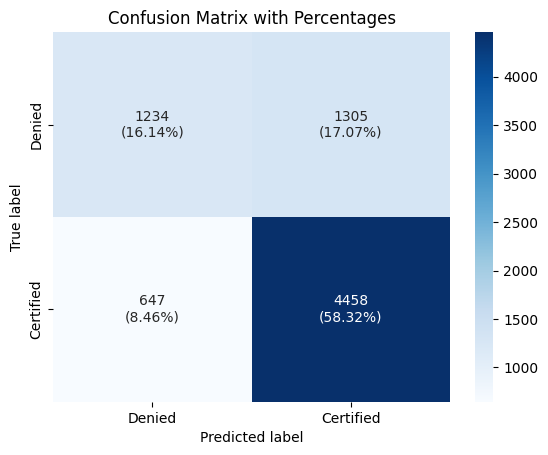

None

In [ ]:
gbcl_100 = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gbcl_100 = gbcl_100.fit(X_train, y_train)
print(gbcl_100.score(X_train, y_train))
print(gbcl_100.score(X_test, y_test))
gbcl_100_df_train, gbcl_100_df_test = get_metrics_and_display_cm(model=gbcl_100)

## Gradient Boosting (n_estimators=250)

0.7679412424310383
0.7441130298273155
Train Confusion Matrix


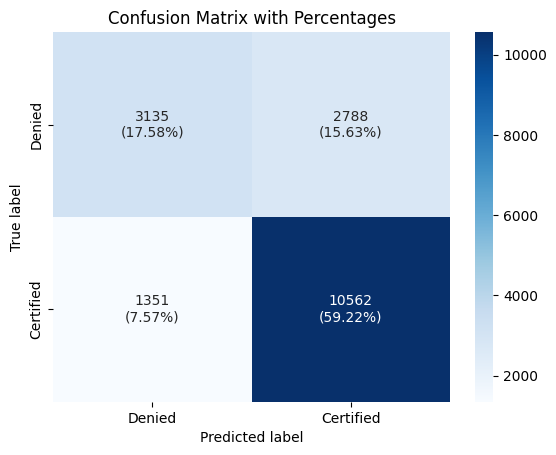

None

Test Confusion Matrix


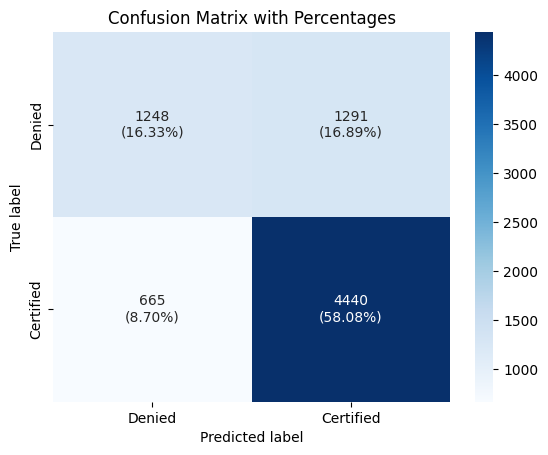

None

In [ ]:
gbcl_250 = GradientBoostingClassifier(n_estimators = 250,random_state=1)
gbcl_250 = gbcl_250.fit(X_train, y_train)
print(gbcl_250.score(X_train, y_train))
print(gbcl_250.score(X_test, y_test))
gbcl_250_df_train, gbcl_250_df_test = get_metrics_and_display_cm(model=gbcl_250)

Gradient Boosting also didn't show overfitting. However after hyperparameter tuning improved the recall of the model.

# Model Performance Comparison and Final Model Selection

In [ ]:
def highlight_cols(s):
    color = 'blue'
    return 'background-color: %s' % color

In [ ]:
models_train_comp_df = pd.concat([
    dTree_df_train.T, dTreeR_3_df_train.T, dTreeR_9_df_train.T, dTreeR_9_5_df_train.T,
     bgcl_df_train.T, bgcl2_df_train.T, bgcl3_df_train.T, bgcl4_df_train.T,
     bgcl_lr_df_train.T, bgcl_lr2_df_train.T, bgcl_lr3_df_train.T, bgcl_lr4_df_train.T,
     rfcl_df_train.T, rfcl2_df_train.T, rfcl3_df_train.T, rfcl4_df_train.T, rfcl5_df_train.T, rfcl6_df_train.T,
     adaB_df_train.T, adaB1_df_train.T, adaB3_df_train.T, adaB_lr_df_train.T,
     gbcl_df_train.T, gbcl_100_df_train.T, gbcl_250_df_train.T
    ], axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree", "Decision Tree(max_depth=3)", "Decision Tree(max_depth=9)", "Decision Tree(max_depth=9 and min_samples=5)",
    "Bagging(Decision Tree)", "Bagging(Decision Tree, max_samples=0.7, max_features=0.7, n_estimators=20)", "Bagging(Decision Tree, max_samples=0.8, max_features=0.8, n_estimators=30)", "Bagging(Decision Tree(Bootstrap_features), max_samples=0.7, max_features=0.7, n_estimators=40)",
    "Bagging(Logistic Regression)", "Bagging(Logistic Regression, max_samples=0.7, max_features=0.7, n_estimators=20)", "Bagging(Logistic Regression, max_samples=0.8, max_features=0.8, n_estimators=30)", "Bagging(Logistic Regression(Bootstrap_features), max_samples=0.7, max_features=0.7, n_estimators=40)",
    "Random Forest", "Random Forest(n_estimators=150, min_samples_leaf=7, max_samples=0.4)", "Random Forest(n_estimators=150, min_samples_leaf=8, max_samples=0.5)", "Random Forest(n_estimators=150, min_samples_leaf=7, max_samples=0.5)", "Random Forest(n_estimators=150, min_samples_leaf=8, max_samples=0.4)", "Random Forest(n_estimators=250, min_samples_leaf=8, max_samples=0.4)",
    "AdaBoost Classifier", "AdaBoost Classifier(Decision Tree max_depth=1)", "AdaBoost Classifier(Decision Tree max_depth=3)", "AdaBoost Classifier(Logistic Regression)",
    "Gradient Boosting", "Gradient Boosting(n_estimators=100)", "Gradient Boosting(n_estimators=25)"]

In [ ]:
best_perf_models_train=list(models_train_comp_df.idxmax(axis=1).value_counts().index)[0]
models_train_comp_df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, best_perf_models_train])

,Decision Tree,Decision Tree(max_depth=3),Decision Tree(max_depth=9),Decision Tree(max_depth=9 and min_samples=5),Bagging(Decision Tree),"Bagging(Decision Tree, max_samples=0.7, max_features=0.7, n_estimators=20)","Bagging(Decision Tree, max_samples=0.8, max_features=0.8, n_estimators=30)","Bagging(Decision Tree(Bootstrap_features), max_samples=0.7, max_features=0.7, n_estimators=40)",Bagging(Logistic Regression),"Bagging(Logistic Regression, max_samples=0.7, max_features=0.7, n_estimators=20)","Bagging(Logistic Regression, max_samples=0.8, max_features=0.8, n_estimators=30)","Bagging(Logistic Regression(Bootstrap_features), max_samples=0.7, max_features=0.7, n_estimators=40)",Random Forest,"Random Forest(n_estimators=150, min_samples_leaf=7, max_samples=0.4)","Random Forest(n_estimators=150, min_samples_leaf=8, max_samples=0.5)","Random Forest(n_estimators=150, min_samples_leaf=7, max_samples=0.5)","Random Forest(n_estimators=150, min_samples_leaf=8, max_samples=0.4)","Random Forest(n_estimators=250, min_samples_leaf=8, max_samples=0.4)",AdaBoost Classifier,AdaBoost Classifier(Decision Tree max_depth=1),AdaBoost Classifier(Decision Tree max_depth=3),AdaBoost Classifier(Logistic Regression),Gradient Boosting,Gradient Boosting(n_estimators=100),Gradient Boosting(n_estimators=25)
Accuracy,1.000000,0.730265,0.767325,0.762559,0.984245,0.980713,0.993889,0.977910,0.738506,0.723593,0.728975,0.716977,1.000000,0.769119,0.770072,0.770520,0.770520,0.767156,0.738058,0.738058,0.738058,0.733460,0.755438,0.759419,0.767941
Recall,1.000000,0.929489,0.858054,0.852430,0.985982,0.994963,0.997985,0.998489,0.879879,0.934357,0.919332,0.946193,1.000000,0.891211,0.889952,0.890708,0.890708,0.887686,0.887434,0.887434,0.887434,0.894485,0.885419,0.882901,0.886594
Precision,1.000000,0.736041,0.806088,0.803911,0.990388,0.976600,0.992901,0.969359,0.764273,0.728516,0.738752,0.718923,1.000000,0.790014,0.791667,0.791748,0.791748,0.789768,0.760411,0.760411,0.760411,0.752915,0.778738,0.784106,0.791161
F1,1.000000,0.821531,0.831260,0.827460,0.988180,0.985696,0.995437,0.983708,0.818012,0.818697,0.819209,0.817048,1.000000,0.837567,0.837937,0.838317,0.838317,0.835869,0.819027,0.819027,0.819027,0.817617,0.828659,0.830576,0.836164


In [ ]:
models_test_comp_df = pd.concat([
    dTree_df_test.T, dTreeR_3_df_test.T, dTreeR_9_df_test.T, dTreeR_9_5_df_test.T,
     bgcl_df_test.T, bgcl2_df_test.T, bgcl3_df_test.T, bgcl4_df_test.T,
     bgcl_lr_df_test.T, bgcl_lr2_df_test.T, bgcl_lr3_df_test.T, bgcl_lr4_df_test.T,
     rfcl_df_test.T, rfcl2_df_test.T, rfcl3_df_test.T, rfcl4_df_test.T, rfcl5_df_test.T, rfcl6_df_test.T,
     adaB_df_test.T, adaB1_df_test.T, adaB3_df_test.T, adaB_lr_df_test.T,
     gbcl_df_test.T, gbcl_100_df_test.T, gbcl_250_df_test.T
    ], axis=1,
)

models_test_comp_df.columns=models_train_comp_df.columns

In [ ]:
best_perf_models_test=list(models_test_comp_df.idxmax(axis=1).value_counts().index)[0]
models_test_comp_df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, best_perf_models_test])

,Decision Tree,Decision Tree(max_depth=3),Decision Tree(max_depth=9),Decision Tree(max_depth=9 and min_samples=5),Bagging(Decision Tree),"Bagging(Decision Tree, max_samples=0.7, max_features=0.7, n_estimators=20)","Bagging(Decision Tree, max_samples=0.8, max_features=0.8, n_estimators=30)","Bagging(Decision Tree(Bootstrap_features), max_samples=0.7, max_features=0.7, n_estimators=40)",Bagging(Logistic Regression),"Bagging(Logistic Regression, max_samples=0.7, max_features=0.7, n_estimators=20)","Bagging(Logistic Regression, max_samples=0.8, max_features=0.8, n_estimators=30)","Bagging(Logistic Regression(Bootstrap_features), max_samples=0.7, max_features=0.7, n_estimators=40)",Random Forest,"Random Forest(n_estimators=150, min_samples_leaf=7, max_samples=0.4)","Random Forest(n_estimators=150, min_samples_leaf=8, max_samples=0.5)","Random Forest(n_estimators=150, min_samples_leaf=7, max_samples=0.5)","Random Forest(n_estimators=150, min_samples_leaf=8, max_samples=0.4)","Random Forest(n_estimators=250, min_samples_leaf=8, max_samples=0.4)",AdaBoost Classifier,AdaBoost Classifier(Decision Tree max_depth=1),AdaBoost Classifier(Decision Tree max_depth=3),AdaBoost Classifier(Logistic Regression),Gradient Boosting,Gradient Boosting(n_estimators=100),Gradient Boosting(n_estimators=25)
Accuracy,0.662219,0.722920,0.730638,0.725929,0.694270,0.713632,0.721350,0.713501,0.738488,0.714417,0.724751,0.708530,0.723443,0.744244,0.746337,0.745160,0.745160,0.745160,0.732993,0.732993,0.732993,0.729461,0.743197,0.744636,0.744113
Recall,0.743976,0.929873,0.834868,0.830558,0.771988,0.864643,0.859158,0.912439,0.880901,0.934378,0.918315,0.943585,0.834868,0.876983,0.876983,0.875612,0.875612,0.874241,0.885015,0.885015,0.885015,0.893046,0.878550,0.873262,0.869736
Precision,0.748669,0.729522,0.778021,0.775137,0.770630,0.746617,0.756598,0.727699,0.763757,0.720762,0.735373,0.712890,0.770287,0.771365,0.773497,0.772955,0.772955,0.773618,0.756530,0.756530,0.756530,0.749712,0.769561,0.773555,0.774734
F1,0.746316,0.817602,0.805443,0.801891,0.771308,0.801307,0.804623,0.809665,0.818157,0.813785,0.816725,0.812173,0.801278,0.820790,0.821996,0.821087,0.821087,0.820857,0.815744,0.815744,0.815744,0.815126,0.820452,0.820390,0.819491


For Training, Decision Tree and Bagging models showed higher levels of overfitting whereas RandomForest and Boosting Models showed almost no overfitting. However HyperParameter Tuning could not improve the much.

**Gradient Boosting(n_estimators=100)** showed the best results in terms of model performance and the performance did not vary much in the training dataset as well.

#Business Recommendations

The following are the business recommendations to EasyVisa Consultation:

*   Encourage employers to offer competitive wages that meet or exceed the prevailing rates in their industry and region especially in Island areas.
*   Highlight the value of prior job experience and guide employers to prioritize experienced applicants or assistance for prior job experience
*   Advise employers to offer full-time positions wherever possible to improve visa application success rates.
*   Create a self-assessment tool for applicants and employers to evaluate and refine their visa applications.